In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
#################
### Todo
### 2. think about evolution in slope (changes in offsets, z values?)
####           a) Need to create upstream and downstream offsets, adjust
####              these in slope adjustment and fix flow depth calcs
####              to account for offsets.
####           B) tried approach of offset adjustment. this seemed unstable
####              if instead we adjust z_arr to bed and calc slope from z_arr, this seems to work
####              Had to adjust flow calculation because of this. z_arr-->z_arr-xc.ymin
### 3. create test cases
###########3
### 4. brainstorm model scenarios to run (do this next, then plan appropriate test cases)
###     A) Thinking about short time scales - how do seasonal patterns
###        reflect in average erosion rates. 
###          1. different scenarios with different length scales of exchange and dissolution 
#####        2. seasonal sinusoidal temp curve (ignore diurnal cycles?)
###     B) Single conduit evolution
###        1. how does long-term evolution differ with w/o CO2 exchange
###        2. what impact does slope-dependent exchange have?
###        3. shear-stress dependent production (based on grain size)
###        4. How do phreatic loops evolve
###        5. What happens during periods of base level fall, stasis, or aggradation?
#################################

### 5. how to deal with loss of point density (different resampling scheme?)

Populating the interactive namespace from numpy and matplotlib


In [12]:
#import pixiedust


In [44]:
#%%pixie_debugger
from CO2_sim_1D import CO2_1D

n=50
x = linspace(0,5000,n)
z = linspace(0,1,n)
np.random.seed(7)
r = 0.5*ones(n-1)# + 0.1*np.random.rand(n-1)
#r[5] = 0.5
sim = CO2_1D(x,z, init_radii=r, 
             Q_w=0.1, 
             T_outside=0., 
             D_a=35., D_w=35.,
             adv_disp_stabil_factor=0.5,
             reduction_factor=0.02,
            dt_erode=1.,
            xc_n=1500)
ntimes = 65
fd_old=0.
for t in arange(ntimes):
    print('t=',t)
    sim.calc_flow_depths()
    fd_new = sim.fd_mids[0]
    #if t>0 and np.abs(fd_new-fd_old)>0.05:
    #    print(asdf)
    fd_old = fd_new
    sim.calc_air_flow()
    #if sim.A_a.min()==0:
    #    print(asdf)
    sim.calc_steady_state_transport()
    sim.erode_xcs()
    sim.z_arr[0] -= 0.0005
    #if t==160:
    #    print(asdf)
    if t % 10 == 0:
        timestep_str = '%04d' % (t,)
        print("Plotting timestep: ",t)
        figure()
        plot(sim.xcs[0].x ,sim.xcs[0].y)
        wl = sim.fd_mids[0]+ sim.xcs[0].y.min()
        plot([-.5,.5], [wl,wl])
        plot(sim.xcs[4].x ,sim.xcs[4].y)
        plot(sim.xcs[-1].x ,sim.xcs[-1].y)
        savefig('./XC-'+timestep_str+'.png')
        figure()
        xmid = (x[1:] + x[:-1])/2.
        plot(x, sim.h)
        plot(x,z)
        plot(x,sim.CO2_w)
        plot(x,sim.CO2_a)
        plot(x,sim.Ca)
        legend(['h','z','w','a','Ca'])
        savefig('./Profile-'+timestep_str+'.png')
        close('all')

t= 0
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 0
about to minimize
found min
Q residual for 0.7175598521593207  = 5.155401192058484e-08
norm_fd= 0.7175598521593207   maxdepth= 0.9999994516877171
norm
getting width
got L,R
setting fd
done with this xc
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 1
about to minimize
found min
Q residual for 0.7175598521593228  = 5.155401178180696e-08
norm_fd= 0.7175598521593228   maxdepth= 0.9999994516877171
norm
getting width
got L,R
setting fd
done with this xc
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 2
about to minimize
found min
Q 

got L,R
setting fd
done with this xc
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 25
about to minimize
found min
Q residual for 0.7175598521593237  = 5.1554011837318114e-08
norm_fd= 0.7175598521593237   maxdepth= 0.9999994516877171
norm
getting width
got L,R
setting fd
done with this xc
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 26
about to minimize
found min
Q residual for 0.7175598521593207  = 5.1554011906707053e-08
norm_fd= 0.7175598521593207   maxdepth= 0.9999994516877171
norm
getting width
got L,R
setting fd
done with this xc
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171


min T_b= 0.46381957433431414
mean T_b= 0.48911691080549624
min T_b= 0.463819574334061
mean T_b= 0.4891169108052293
min T_b= 0.46381957433436466
mean T_b= 0.4891169108055495
min T_b= 0.4638195743341216
mean T_b= 0.48911691080529324
min T_b= 0.46381957433427384
mean T_b= 0.4891169108054537
min T_b= 0.46381957433421533
mean T_b= 0.4891169108053921
min T_b= 0.4638195743341498
mean T_b= 0.48911691080532294
min T_b= 0.46381957433427845
mean T_b= 0.48911691080545866
min T_b= 0.46381957433421533
mean T_b= 0.4891169108053921
min T_b= 0.46381957433421533
mean T_b= 0.4891169108053921
min T_b= 0.46381957433414717
mean T_b= 0.4891169108053202
min T_b= 0.46381957433428095
mean T_b= 0.4891169108054612
min T_b= 0.46381957433421533
mean T_b= 0.4891169108053921
min T_b= 0.46381957433421533
mean T_b= 0.4891169108053921
min T_b= 0.46381957433421533
mean T_b= 0.4891169108053921
min T_b= 0.46381957433414717
mean T_b= 0.4891169108053202
min T_b= 0.46381957433428095
mean T_b= 0.4891169108054612
min T_b= 0.463

t= 1
xc points= 1187  maxdpeth= 1.000208774979046   max_interp= 0.8969498151991508
xc points= 1187  maxdpeth= 1.000208774979046   max_interp= 0.8969498151991508
xc= 0
about to minimize
found min
Q residual for 0.7216254260250263  = 1.7345122080292263e-07
norm_fd= 0.7216254260250263   maxdepth= 1.000208774979046
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1187  maxdpeth= 1.0002197537289241   max_interp= 0.8969498151991535
xc points= 1187  maxdpeth= 1.0002197537289241   max_interp= 0.8969498151991535
xc= 1
about to minimize
found min
Q residual for 0.7172580008150896  = 8.55240252506384e-08
norm_fd= 0.7172580008150896   maxdepth= 1.0002197537289241
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1187  maxdpeth= 1.0002308958459896   max_interp= 0.896949815199152
xc points= 1187  maxdpeth= 1.0002308958459896   max_interp= 0.896949815199152
xc= 2
about to minimize
found min
Q residual for 0.7172147969144796  = 1.0560667658421341e-07
norm_fd= 0.71721

got L,R
setting fd
done with this xc
xc points= 1187  maxdpeth= 1.0005198092149663   max_interp= 0.8969498151991508
xc points= 1187  maxdpeth= 1.0005198092149663   max_interp= 0.8969498151991508
xc= 26
about to minimize
found min
Q residual for 0.716128202774388  = 7.1752841349082e-08
norm_fd= 0.716128202774388   maxdepth= 1.0005198092149663
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1187  maxdpeth= 1.0005309387180816   max_interp= 0.8969498151991508
xc points= 1187  maxdpeth= 1.0005309387180816   max_interp= 0.8969498151991508
xc= 27
about to minimize
found min
Q residual for 0.7160830082793433  = 1.8312005790888097e-07
norm_fd= 0.7160830082793433   maxdepth= 1.0005309387180816
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1187  maxdpeth= 1.0005419775646036   max_interp= 0.8969498151991508
xc points= 1187  maxdpeth= 1.0005419775646036   max_interp= 0.8969498151991508
xc= 28
about to minimize
found min
Q residual for 0.7160416283760626  = 8.

min T_b= 0.463873409038923
mean T_b= 0.48841108951438633
min T_b= 0.4638538702250078
mean T_b= 0.488390846615276
min T_b= 0.4638337411087911
mean T_b= 0.48836998636371437
min T_b= 0.46378555749733885
mean T_b= 0.48831959188476837
min T_b= 0.4638381417425845
mean T_b= 0.4883753003754929
min T_b= 0.4637453127974871
mean T_b= 0.4882606354715458
min T_b= 0.46373300508351745
mean T_b= 0.4882480295457337
min T_b= 0.46369875809021127
mean T_b= 0.48821232961881383
min T_b= 0.4637453838149648
mean T_b= 0.48826178312084856
min T_b= 0.46365449752807736
mean T_b= 0.4881664604275005
min T_b= 0.46362427987555077
mean T_b= 0.48813501945067744
min T_b= 0.46362974045174693
mean T_b= 0.4881411489877491
min T_b= 0.46359073131225026
mean T_b= 0.48810046409412994
min T_b= 0.463595212942598
mean T_b= 0.4881055759286163
min T_b= 0.46352269092338466
mean T_b= 0.48802961983736626
min T_b= 0.46350798019787987
mean T_b= 0.4880145388296242
min T_b= 0.4634933135693526
mean T_b= 0.4879995119146336
min T_b= 0.463404

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1185  maxdpeth= 1.0005543727198212   max_interp= 0.8963190515406582
xc points= 1185  maxdpeth= 1.0005543727198212   max_interp= 0.8963190515406582
xc= 6
about to minimize
found min
Q residual for 0.7159493603015464  = 2.07469788571224e-09
norm_fd= 0.7159493603015464   maxdepth= 1.0005543727198212
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1185  maxdpeth= 1.0005783165633124   max_interp= 0.8962693655580433
xc points= 1185  maxdpeth= 1.0005783165633124   max_interp= 0.8962693655580433
xc= 7
about to minimize
found min
Q residual for 0.7158242405876329  = 8.59356683036161e-09
norm_fd= 0.7158242405876329   maxdepth= 1.0005783165633124
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1185  maxdpeth= 1.0006025784050006   max_interp= 0.8962180912011041
xc points= 1185  maxdpeth= 1.0006025784050006   max_interp= 0.8962180912011041
xc= 8
about to minimize
found min
Q residual for 0.71565

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1183  maxdpeth= 1.0011712036963536   max_interp= 0.8948382220445285
xc points= 1183  maxdpeth= 1.0011712036963536   max_interp= 0.8948382220445285
xc= 32
about to minimize
found min
Q residual for 0.7140848793725943  = 5.792398426185397e-08
norm_fd= 0.7140848793725943   maxdepth= 1.0011712036963536
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1183  maxdpeth= 1.0011925269554773   max_interp= 0.8947862240106017
xc points= 1183  maxdpeth= 1.0011925269554773   max_interp= 0.8947862240106017
xc= 33
about to minimize
found min
Q residual for 0.7139608521978131  = 5.6660152417120635e-08
norm_fd= 0.7139608521978131   maxdepth= 1.0011925269554773
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1183  maxdpeth= 1.001213664798893   max_interp= 0.89473043309157
xc points= 1183  maxdpeth= 1.001213664798893   max_interp= 0.89473043309157
xc= 34
about to minimize
found min
Q residual for 0.71383

min T_b= 0.4621812641969747
mean T_b= 0.4857897467790672
min T_b= 0.4620222297366142
mean T_b= 0.48562554654545503
min T_b= 0.46138678769594976
mean T_b= 0.4849606372028244
min T_b= 0.46195970727361685
mean T_b= 0.4855658784200367
min T_b= 0.4618717652794329
mean T_b= 0.4854765503602142
min T_b= 0.4610822398310385
mean T_b= 0.4853907536511061
min T_b= 0.4835994648979305
mean T_b= 0.5090985308667861
min T_b= 0.462143004900237
mean T_b= 0.48577127721729263
min T_b= 0.46227428012389526
mean T_b= 0.48591249622661303
min T_b= 0.4623550256377737
mean T_b= 0.4860005747794985
min T_b= 0.4625391611758448
mean T_b= 0.48619731104233804
min T_b= 0.46078366937079035
mean T_b= 0.48509608138037796
min T_b= 0.4617256345411626
mean T_b= 0.4860909362652065
min T_b= 0.4617689676057739
mean T_b= 0.486139716812116
min T_b= 0.46240714788377374
mean T_b= 0.48681470789433706
min T_b= 0.46179907909339657
mean T_b= 0.4861776406283204
min T_b= 0.4490150435191816
mean T_b= 0.47271249900600554
min T_b= 0.485551318

found min
Q residual for 0.7151965151513258  = 5.225175597756149e-09
norm_fd= 0.7151965151513258   maxdepth= 1.0010531862740761
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1183  maxdpeth= 1.0011009951848668   max_interp= 0.8949463528799191
xc points= 1183  maxdpeth= 1.0011009951848668   max_interp= 0.8949463528799191
xc= 13
about to minimize
found min
Q residual for 0.7150080438664307  = 2.771797678879917e-08
norm_fd= 0.7150080438664307   maxdepth= 1.0011009951848668
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1183  maxdpeth= 1.0011306336872625   max_interp= 0.8947468975767293
xc points= 1183  maxdpeth= 1.0011306336872625   max_interp= 0.8947468975767293
xc= 14
about to minimize
found min
Q residual for 0.7143415309935597  = 2.8229112644662102e-08
norm_fd= 0.7143415309935597   maxdepth= 1.0011306336872625
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1182  maxdpeth= 1.0011683928301962   max_interp= 0.894550333344618
xc 

found min
Q residual for 0.7121556466771791  = 4.1093507485712166e-08
norm_fd= 0.7121556466771791   maxdepth= 1.001913073337195
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1177  maxdpeth= 1.0019455135787996   max_interp= 0.8918589977380371
xc points= 1177  maxdpeth= 1.0019455135787996   max_interp= 0.8918589977380371
xc= 38
about to minimize
found min
Q residual for 0.71204006384905  = 1.2969656233707827e-07
norm_fd= 0.71204006384905   maxdepth= 1.0019455135787996
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1177  maxdpeth= 1.0019744904540622   max_interp= 0.8917046407068727
xc points= 1177  maxdpeth= 1.0019744904540622   max_interp= 0.8917046407068727
xc= 39
about to minimize
found min
Q residual for 0.7125325257566651  = 5.362441621303837e-08
norm_fd= 0.7125325257566651   maxdepth= 1.0019744904540622
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1177  maxdpeth= 1.0020052500296857   max_interp= 0.8915514602562529
xc poi

min T_b= 0.46098444995845245
mean T_b= 0.4844828170343039
min T_b= 0.4792872566434727
mean T_b= 0.5037108757139588
min T_b= 0.4598757571631372
mean T_b= 0.483332172302437
min T_b= 0.45823769523707897
mean T_b= 0.48160032181996654
min T_b= 0.46427120414024575
mean T_b= 0.48794726832251717
min T_b= 0.45853760069892324
mean T_b= 0.4819374235405875
min T_b= 0.46032801512253047
mean T_b= 0.4838240628177448
min T_b= 0.45961623512720134
mean T_b= 0.48308083640865085
min T_b= 0.47560855024432847
mean T_b= 0.5006583368327006
min T_b= 0.4659449153198586
mean T_b= 0.4897424503989124
min T_b= 0.45469564616003283
mean T_b= 0.47792034795120714
min T_b= 0.459475200807836
mean T_b= 0.4836851675370869
min T_b= 0.6573196052932633
mean T_b= 0.6919711354890679
min T_b= 0.48849246210167574
mean T_b= 0.5105343589142691
dz= [-0.00021177 -0.00026085 -0.00022916 -0.00023884 -0.00025325 -0.00026807
 -0.00027487 -0.000287   -0.00029849 -0.00031271 -0.00032306 -0.00033619
 -0.00035631 -0.00036231 -0.00037082 -0.0

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1173  maxdpeth= 1.0027521263763548   max_interp= 0.8896840454494168
xc points= 1173  maxdpeth= 1.0027521263763548   max_interp= 0.8896840454494168
xc= 42
about to minimize
found min
Q residual for 0.710203175579227  = 8.741769842723901e-08
norm_fd= 0.710203175579227   maxdepth= 1.0027521263763548
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1173  maxdpeth= 1.002792353201737   max_interp= 0.8893907575824572
xc points= 1173  maxdpeth= 1.002792353201737   max_interp= 0.8893907575824572
xc= 43
about to minimize
found min
Q residual for 0.7096758242826315  = 1.0677301806594208e-08
norm_fd= 0.7096758242826315   maxdepth= 1.002792353201737
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1172  maxdpeth= 1.002832081978343   max_interp= 0.8890994775897488
xc points= 1172  maxdpeth= 1.002832081978343   max_interp= 0.8890994775897488
xc= 44
about to minimize
found min
Q residual for 0.709282

dz= [-0.00021207 -0.00029267 -0.00022324 -0.00024028 -0.00025408 -0.00026499
 -0.00027338 -0.00028605 -0.0003035  -0.00031144 -0.00032071 -0.0003422
 -0.00034816 -0.00035871 -0.00037317 -0.0003911  -0.0003959  -0.00040911
 -0.00043265 -0.0004271  -0.00045836 -0.00046145 -0.00046588 -0.00048574
 -0.00048916 -0.00050515 -0.00051897 -0.00053835 -0.00053664 -0.0005452
 -0.00055695 -0.00056806 -0.00059187 -0.00059476 -0.00061193 -0.0005982
 -0.00062847 -0.00063823 -0.00064437 -0.00064775 -0.00067144 -0.00068886
 -0.0006852  -0.00068977 -0.00070211 -0.00071557 -0.00075687 -0.00068454
 -0.00077556]
t= 5
xc points= 1153  maxdpeth= 1.0010554534900746   max_interp= 0.8752031027445855
xc points= 1153  maxdpeth= 1.0010554534900746   max_interp= 0.8752031027445855
xc= 0
about to minimize
found min
Q residual for 0.6934406923954931  = 6.552736744880328e-08
norm_fd= 0.6934406923954931   maxdepth= 1.0010554534900746
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1183  maxdpeth= 1.0

about to minimize
found min
Q residual for 0.7108960559565733  = 1.312945206166649e-07
norm_fd= 0.7108960559565733   maxdepth= 1.0024281884688195
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1173  maxdpeth= 1.002472747465951   max_interp= 0.8899411315955931
xc points= 1173  maxdpeth= 1.002472747465951   max_interp= 0.8899411315955931
xc= 24
about to minimize
found min
Q residual for 0.7106828488002587  = 8.661575075230576e-08
norm_fd= 0.7106828488002587   maxdepth= 1.002472747465951
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1173  maxdpeth= 1.002545945192209   max_interp= 0.8896999597443798
xc points= 1173  maxdpeth= 1.002545945192209   max_interp= 0.8896999597443798
xc= 25
about to minimize
found min
Q residual for 0.7116456902864952  = 7.270998415853658e-08
norm_fd= 0.7116456902864952   maxdepth= 1.002545945192209
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1173  maxdpeth= 1.002593608508692   max_interp= 0.889683678

got L,R
setting fd
done with this xc
xc points= 1170  maxdpeth= 1.0037083986074593   max_interp= 0.888327590731479
xc points= 1170  maxdpeth= 1.0037083986074593   max_interp= 0.888327590731479
xc= 46
about to minimize
found min
Q residual for 0.7089991310728799  = 1.734619758386735e-07
norm_fd= 0.7089991310728799   maxdepth= 1.0037083986074593
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.003623716813921   max_interp= 0.884669627637169
xc points= 1165  maxdpeth= 1.003623716813921   max_interp= 0.884669627637169
xc= 47
about to minimize
found min
Q residual for 0.7038181408874259  = 4.0485951438573586e-08
norm_fd= 0.7038181408874259   maxdepth= 1.003623716813921
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.0037749526298012   max_interp= 0.8865135852524029
xc points= 1167  maxdpeth= 1.0037749526298012   max_interp= 0.8865135852524029
xc= 48
about to minimize
found min
Q residual for 0.7089466849161034  = 2.877

got L,R
setting fd
done with this xc
xc points= 1177  maxdpeth= 1.0013558301183996   max_interp= 0.8910834520327806
xc points= 1177  maxdpeth= 1.0013558301183996   max_interp= 0.8910834520327806
xc= 2
about to minimize
found min
Q residual for 0.7092475374710265  = 2.7767432690672944e-07
norm_fd= 0.7092475374710265   maxdepth= 1.0013558301183996
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1180  maxdpeth= 1.0014533583326577   max_interp= 0.8933777494211952
xc points= 1180  maxdpeth= 1.0014533583326577   max_interp= 0.8933777494211952
xc= 3
about to minimize
found min
Q residual for 0.7154669953062046  = 7.502463983399821e-08
norm_fd= 0.7154669953062046   maxdepth= 1.0014533583326577
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1181  maxdpeth= 1.0015221827993273   max_interp= 0.893813898948297
xc points= 1181  maxdpeth= 1.0015221827993273   max_interp= 0.893813898948297
xc= 4
about to minimize
found min
Q residual for 0.7140327857121588  = 1.6

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1171  maxdpeth= 1.0031825019483596   max_interp= 0.8883043698643163
xc points= 1171  maxdpeth= 1.0031825019483596   max_interp= 0.8883043698643163
xc= 27
about to minimize
found min
Q residual for 0.7092030123397248  = 1.1750697345713768e-08
norm_fd= 0.7092030123397248   maxdepth= 1.0031825019483596
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1171  maxdpeth= 1.0032421776228668   max_interp= 0.8883590198107233
xc points= 1171  maxdpeth= 1.0032421776228668   max_interp= 0.8883590198107233
xc= 28
about to minimize
found min
Q residual for 0.7085737211644069  = 6.195224680483058e-08
norm_fd= 0.7085737211644069   maxdepth= 1.0032421776228668
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1169  maxdpeth= 1.0032964139284042   max_interp= 0.8875983805975198
xc points= 1169  maxdpeth= 1.0032964139284042   max_interp= 0.8875983805975198
xc= 29
about to minimize
found min
Q residual for 0

min T_b= 0.4582834674350931
mean T_b= 0.4785504359808386
min T_b= 0.4708476734430144
mean T_b= 0.4916778251408818
min T_b= 0.46108283386202414
mean T_b= 0.4814963700769722
min T_b= 0.43118611798354395
mean T_b= 0.4509289776280412
min T_b= 0.529722934530402
mean T_b= 0.5547546979568527
min T_b= 0.4091895789978145
mean T_b= 0.4273389771004718
min T_b= 0.47503435583376097
mean T_b= 0.49752509613917417
min T_b= 0.48075324200102537
mean T_b= 0.5027960037662087
min T_b= 0.4375415574920901
mean T_b= 0.4576139207019245
min T_b= 0.4773656644514445
mean T_b= 0.4999895152775442
min T_b= 0.4623489433275936
mean T_b= 0.48427464945448245
min T_b= 0.44873833184507966
mean T_b= 0.4700159202030413
min T_b= 0.4523619304966598
mean T_b= 0.4738437448356715
min T_b= 0.48658292900238365
mean T_b= 0.5104386888295055
min T_b= 0.4574685320604815
mean T_b= 0.4792087433902276
min T_b= 0.46934241666902815
mean T_b= 0.49238104870303173
min T_b= 0.4459131810211785
mean T_b= 0.4678066785020518
min T_b= 0.47725170137

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1177  maxdpeth= 1.002021468921942   max_interp= 0.8921062110269733
xc points= 1177  maxdpeth= 1.002021468921942   max_interp= 0.8921062110269733
xc= 7
about to minimize
found min
Q residual for 0.7132503547876509  = 6.113971745547175e-09
norm_fd= 0.7132503547876509   maxdepth= 1.002021468921942
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1175  maxdpeth= 1.0020935631485703   max_interp= 0.8909969145925851
xc points= 1175  maxdpeth= 1.0020935631485703   max_interp= 0.8909969145925851
xc= 8
about to minimize
found min
Q residual for 0.7123843936376204  = 6.158480392315369e-09
norm_fd= 0.7123843936376204   maxdepth= 1.0020935631485703
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1176  maxdpeth= 1.0021917271764584   max_interp= 0.8911712942101301
xc points= 1176  maxdpeth= 1.0021917271764584   max_interp= 0.8911712942101301
xc= 9
about to minimize
found min
Q residual for 0.712723

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1169  maxdpeth= 1.0055377670136885   max_interp= 0.8884968202882342
xc points= 1169  maxdpeth= 1.0055377670136885   max_interp= 0.8884968202882342
xc= 48
about to minimize
found min
Q residual for 0.7160729617251465  = 5.476080150446094e-08
norm_fd= 0.7160729617251465   maxdepth= 1.0055377670136885
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  0.0771485068171809  m^3/s
min T_b= 0.29945522647878164
mean T_b= 0.9744615320968703
min T_b= 0.2897820047580055
mean T_b= 0.2993955494486911
min T_b= 0.4778374845430694
mean T_b= 0.49601889738402677
min T_b= 0.4782840287682559
mean T_b= 0.4964905125296048
min T_b= 0.4394593912729333
mean T_b= 0.456197786943863
min T_b= 0.5385106160812362
mean T_b= 0.5597385764112018
min T_b= 0.4356152260270095
mean T_b= 0.4522496593776667
min T_b= 0.4359381075114338
mean T_b= 0.45315928168922526
min T_b= 0.5055463584311503
mean T_b= 0.5255112660482348
min T_b= 0.43462341

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1189  maxdpeth= 1.0022427300478578   max_interp= 0.8998064643029999
xc points= 1189  maxdpeth= 1.0022427300478578   max_interp= 0.8998064643029999
xc= 1
about to minimize
found min
Q residual for 0.72270850257918  = 9.500640552051465e-11
norm_fd= 0.72270850257918   maxdepth= 1.0022427300478578
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.0016527654473886   max_interp= 0.8812894072935795
xc points= 1161  maxdpeth= 1.0016527654473886   max_interp= 0.8812894072935795
xc= 2
about to minimize
found min
Q residual for 0.6996837348798282  = 1.7816944274107183e-07
norm_fd= 0.6996837348798282   maxdepth= 1.0016527654473886
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1183  maxdpeth= 1.0020275755765167   max_interp= 0.8954930386548666
xc points= 1183  maxdpeth= 1.0020275755765167   max_interp= 0.8954930386548666
xc= 3
about to minimize
found min
Q residual for 0.719

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.005639005766623   max_interp= 0.8812308144503554
xc points= 1157  maxdpeth= 1.005639005766623   max_interp= 0.8812308144503554
xc= 43
about to minimize
found min
Q residual for 0.7045961267637574  = 1.2667795712406615e-07
norm_fd= 0.7045961267637574   maxdepth= 1.005639005766623
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1155  maxdpeth= 1.005614551163944   max_interp= 0.879335499389017
xc points= 1155  maxdpeth= 1.005614551163944   max_interp= 0.879335499389017
xc= 44
about to minimize
found min
Q residual for 0.6991513882874126  = 1.898022967822266e-07
norm_fd= 0.6991513882874126   maxdepth= 1.005614551163944
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1155  maxdpeth= 1.0057751465393212   max_interp= 0.8796185026022281
xc points= 1155  maxdpeth= 1.0057751465393212   max_interp= 0.8796185026022281
xc= 45
about to minimize
found min
Q residual for 0.7028056

dz= [-0.00021431 -0.00040263 -0.00022756 -0.00022355 -0.00018688 -0.00028796
 -0.00026419 -0.00028889 -0.00029159 -0.00030888 -0.00031887 -0.00034267
 -0.00032567 -0.0003752  -0.0003698  -0.0003798  -0.00038487 -0.00043852
 -0.00040767 -0.00038902 -0.00052124 -0.00036188 -0.00052244 -0.00046368
 -0.00046871 -0.00054597 -0.00045412 -0.00055937 -0.00051945 -0.00056131
 -0.00052355 -0.00060541 -0.00054015 -0.00060244 -0.00060762 -0.00058799
 -0.00066426 -0.00056871 -0.00068696 -0.00061486 -0.00070477 -0.00063135
 -0.00067785 -0.00074989 -0.00060607 -0.00077759 -0.00071566 -0.00046906
 -0.00121286]
t= 9
xc points= 1107  maxdpeth= 1.0019091021556006   max_interp= 0.8420967247928537
xc points= 1107  maxdpeth= 1.0019091021556006   max_interp= 0.8420967247928537
xc= 0
about to minimize
found min
Q residual for 0.6676892451198125  = 1.6718142072102982e-07
norm_fd= 0.6676892451198125   maxdepth= 1.0019091021556006
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1194  maxdpeth=

found min
Q residual for 0.7053099634680867  = 1.827913496399436e-07
norm_fd= 0.7053099634680867   maxdepth= 1.0043520121701976
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.0043934907191923   max_interp= 0.8822893231391439
xc points= 1161  maxdpeth= 1.0043934907191923   max_interp= 0.8822893231391439
xc= 24
about to minimize
found min
Q residual for 0.7046785530185946  = 1.591623211560922e-07
norm_fd= 0.7046785530185946   maxdepth= 1.0043934907191923
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.0046523426319833   max_interp= 0.886591575275575
xc points= 1167  maxdpeth= 1.0046523426319833   max_interp= 0.886591575275575
xc= 25
about to minimize
found min
Q residual for 0.708907863385944  = 3.955103200503629e-08
norm_fd= 0.708907863385944   maxdepth= 1.0046523426319833
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.0045572556119091   max_interp= 0.8807652127238497
xc poin

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1189  maxdpeth= 1.0078090363059187   max_interp= 0.903578654480372
xc points= 1189  maxdpeth= 1.0078090363059187   max_interp= 0.903578654480372
xc= 48
about to minimize
found min
Q residual for 0.737607169481231  = 9.319130321594482e-08
norm_fd= 0.737607169481231   maxdepth= 1.0078090363059187
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  0.07752753155047513  m^3/s
min T_b= 0.6724275512716794
mean T_b= 1.784251333365307
min T_b= 0.12572708197636784
mean T_b= 0.12890668642645217
min T_b= 0.3351845891019287
mean T_b= 0.3465075861797655
min T_b= 0.6152266887197378
mean T_b= 0.7122171899856836
min T_b= 0.276994639783569
mean T_b= 0.2860620413182196
min T_b= 0.5726299225302779
mean T_b= 0.594188356436128
min T_b= 0.5224736522627368
mean T_b= 0.5408267722132803
min T_b= 0.31811847808489624
mean T_b= 0.3289254211424441
min T_b= 0.6275983543318646
mean T_b= 0.6512835756225622
min T_b= 0.3156609016196

about to minimize
found min
Q residual for 0.707885934128054  = 1.3003138020495353e-07
norm_fd= 0.707885934128054   maxdepth= 1.00235766395135
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1180  maxdpeth= 1.0027103845669345   max_interp= 0.8941295088763204
xc points= 1180  maxdpeth= 1.0027103845669345   max_interp= 0.8941295088763204
xc= 5
about to minimize
found min
Q residual for 0.7168839471442878  = 1.1535580642096921e-07
norm_fd= 0.7168839471442878   maxdepth= 1.0027103845669345
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1171  maxdpeth= 1.002697765730244   max_interp= 0.8879426130611727
xc points= 1171  maxdpeth= 1.002697765730244   max_interp= 0.8879426130611727
xc= 6
about to minimize
found min
Q residual for 0.7087102837434203  = 5.3761572221810994e-08
norm_fd= 0.7087102837434203   maxdepth= 1.002697765730244
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1173  maxdpeth= 1.0028952444567432   max_interp= 0.89019689

found min
Q residual for 0.6974921905100944  = 1.0241255275766914e-07
norm_fd= 0.6974921905100944   maxdepth= 1.0052846246957658
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.0055297033325692   max_interp= 0.8806665000066037
xc points= 1157  maxdpeth= 1.0055297033325692   max_interp= 0.8806665000066037
xc= 29
about to minimize
found min
Q residual for 0.7062752664765904  = 6.620839189397376e-08
norm_fd= 0.7062752664765904   maxdepth= 1.0055297033325692
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1154  maxdpeth= 1.0055166530120418   max_interp= 0.8786364238734874
xc points= 1154  maxdpeth= 1.0055166530120418   max_interp= 0.8786364238734874
xc= 30
about to minimize
found min
Q residual for 0.70010122543513  = 1.7526367247777674e-07
norm_fd= 0.70010122543513   maxdepth= 1.0055166530120418
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.0058239291031454   max_interp= 0.8828438012543026
xc po

min T_b= 0.5130881405232753
mean T_b= 0.5364752863211902
min T_b= 0.41042014936513666
mean T_b= 0.42914322607042465
min T_b= 0.5268400556824405
mean T_b= 0.5761769263635669
min T_b= 0.2825555464381163
mean T_b= 0.29506465375825425
min T_b= 0.4437810373894593
mean T_b= 0.6998180335660082
min T_b= 0.2442667686769345
mean T_b= 0.25511625016988776
min T_b= 0.19047569718880136
mean T_b= 0.26107651071502447
min T_b= 0.35957063684946877
mean T_b= 0.47207049252340194
min T_b= 1.2311618389257462
mean T_b= 2.0962650038235227
min T_b= 0.5504415958443905
mean T_b= 0.5603313825170111
min T_b= 0.7913809518158429
mean T_b= 2.452905708151641
min T_b= 0.1822848074054978
mean T_b= 0.18633916889939933
min T_b= 0.050647266575229874
mean T_b= 0.052120447136306966
min T_b= 0.39879612690664795
mean T_b= 0.9883625085555887
min T_b= 0.15631619126598548
mean T_b= 0.16071713679596936
min T_b= 0.5107271226269864
mean T_b= 0.5291456171375691
min T_b= 0.6860803031590241
mean T_b= 0.7100082112227409
min T_b= 0.12274

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.0054208998822147   max_interp= 0.8803974511068126
xc points= 1157  maxdpeth= 1.0054208998822147   max_interp= 0.8803974511068126
xc= 24
about to minimize
found min
Q residual for 0.7103672519155788  = 1.962105933284164e-07
norm_fd= 0.7103672519155788   maxdepth= 1.0054208998822147
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.00575563697125   max_interp= 0.8850950179591454
xc points= 1163  maxdpeth= 1.00575563697125   max_interp= 0.8850950179591454
xc= 25
about to minimize
found min
Q residual for 0.707170708645107  = 1.4781627491466942e-07
norm_fd= 0.707170708645107   maxdepth= 1.00575563697125
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1143  maxdpeth= 1.0052985384834263   max_interp= 0.8701971005755792
xc points= 1143  maxdpeth= 1.0052985384834263   max_interp= 0.8701971005755792
xc= 26
about to minimize
found min
Q residual for 0.6914

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1265  maxdpeth= 1.01096552548937   max_interp= 0.9505987123754723
xc points= 1265  maxdpeth= 1.01096552548937   max_interp= 0.9505987123754723
xc= 48
about to minimize
found min
Q residual for 0.7899000483830828  = 4.151159213594546e-08
norm_fd= 0.7899000483830828   maxdepth= 1.01096552548937
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  0.07705543478349294  m^3/s
min T_b= 0.5973272153702275
mean T_b= 2.201394161941741
min T_b= 0.3937451635158971
mean T_b= 0.47293046671418554
min T_b= 0.3274138322516103
mean T_b= 0.4690915374981495
min T_b= 0.6627585687643269
mean T_b= 1.4541952261229294
min T_b= 0.02537701868688222
mean T_b= 0.025959787882437396
min T_b= 0.23078325144583897
mean T_b= 0.2384890381121634
min T_b= 0.17026452819045687
mean T_b= 0.34717297378658557
min T_b= 0.35471349584623474
mean T_b= 0.4729710976089489
min T_b= 0.2468708322161021
mean T_b= 0.5915846872008164
min T_b= 0.35059

xc= 4
about to minimize
found min
Q residual for 0.7091521870067516  = 5.631180813314707e-09
norm_fd= 0.7091521870067516   maxdepth= 1.0027405232800475
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1187  maxdpeth= 1.0033570307488215   max_interp= 0.8991187559567095
xc points= 1187  maxdpeth= 1.0033570307488215   max_interp= 0.8991187559567095
xc= 5
about to minimize
found min
Q residual for 0.7207779833250586  = 2.5463188096930267e-07
norm_fd= 0.7207779833250586   maxdepth= 1.0033570307488215
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1162  maxdpeth= 1.003074819299877   max_interp= 0.882382397470308
xc points= 1162  maxdpeth= 1.003074819299877   max_interp= 0.882382397470308
xc= 6
about to minimize
found min
Q residual for 0.7017532445098532  = 3.5129640349462754e-08
norm_fd= 0.7017532445098532   maxdepth= 1.003074819299877
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1177  maxdpeth= 1.0035508732256013   max_interp= 

xc points= 1178  maxdpeth= 1.0061314522357572   max_interp= 0.8955725223653878
xc= 28
about to minimize
found min
Q residual for 0.6811347538282183  = 7.026441901925029e-08
norm_fd= 0.6811347538282183   maxdepth= 1.0061314522357572
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1168  maxdpeth= 1.0066659058955283   max_interp= 0.888990577818791
xc points= 1168  maxdpeth= 1.0066659058955283   max_interp= 0.888990577818791
xc= 29
about to minimize
found min
Q residual for 0.7095025704510458  = 5.4400949078825533e-08
norm_fd= 0.7095025704510458   maxdepth= 1.0066659058955283
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1139  maxdpeth= 1.0062299814255122   max_interp= 0.8680747630277343
xc points= 1139  maxdpeth= 1.0062299814255122   max_interp= 0.8680747630277343
xc= 30
about to minimize
found min
Q residual for 0.6886817096489282  = 1.3549696745163153e-07
norm_fd= 0.6886817096489282   maxdepth= 1.0062299814255122
norm
getting width
got L,R
sett

min T_b= 0.5960758671156554
mean T_b= 0.7299423147353504
min T_b= 0.25011457820286476
mean T_b= 0.25932398592587474
min T_b= 0.5215918524197162
mean T_b= 0.7392156341053062
min T_b= 0.15286434038686986
mean T_b= 0.15851285762133183
min T_b= 0.3400675661695272
mean T_b= 0.8099665877585311
min T_b= 0.20996374960613584
mean T_b= 0.21774723951956804
min T_b= 0.5524062657650349
mean T_b= 0.6588430521854884
min T_b= 0.31244752914674323
mean T_b= 0.3252850770238117
min T_b= 0.5500513318838827
mean T_b= 0.6471018729311452
min T_b= 0.20023750956099415
mean T_b= 0.20848365827717566
min T_b= 0.4906642472871819
mean T_b= 0.8584851213413104
min T_b= 0.038663213745208064
mean T_b= 0.04015849368917981
min T_b= 0.09904757873702652
mean T_b= 0.18203387867488618
min T_b= 0.3030838366651718
mean T_b= 0.4649782564054934
min T_b= 0.25626422036560303
mean T_b= 0.46452219280311124
min T_b= 0.3524444612269815
mean T_b= 0.46263118205314946
min T_b= 1.5559306316442931
mean T_b= 2.609906391045083
min T_b= 0.5667

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.00369354258977   max_interp= 0.8819832552892669
xc points= 1161  maxdpeth= 1.00369354258977   max_interp= 0.8819832552892669
xc= 8
about to minimize
found min
Q residual for 0.7009366407049953  = 8.078609790851399e-08
norm_fd= 0.7009366407049953   maxdepth= 1.00369354258977
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1173  maxdpeth= 1.0041588593405968   max_interp= 0.8903558262583154
xc points= 1173  maxdpeth= 1.0041588593405968   max_interp= 0.8903558262583154
xc= 9
about to minimize
found min
Q residual for 0.7146914964479597  = 3.078022900449007e-08
norm_fd= 0.7146914964479597   maxdepth= 1.0041588593405968
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1160  maxdpeth= 1.004053993177417   max_interp= 0.8816753163164549
xc points= 1160  maxdpeth= 1.004053993177417   max_interp= 0.8816753163164549
xc= 10
about to minimize
found min
Q residual for 0.7023841

xc= 31
about to minimize
found min
Q residual for 0.734931980166179  = 1.3566391109109954e-07
norm_fd= 0.734931980166179   maxdepth= 1.008098088892842
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1177  maxdpeth= 1.0069049016958485   max_interp= 0.895589355314971
xc points= 1177  maxdpeth= 1.0069049016958485   max_interp= 0.895589355314971
xc= 32
about to minimize
found min
Q residual for 0.6705049309863216  = 8.38632345789847e-08
norm_fd= 0.6705049309863216   maxdepth= 1.0069049016958485
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1186  maxdpeth= 1.0082290566516394   max_interp= 0.9023094230161528
xc points= 1186  maxdpeth= 1.0082290566516394   max_interp= 0.9023094230161528
xc= 33
about to minimize
found min
Q residual for 0.7219192507977369  = 1.1699222268735099e-07
norm_fd= 0.7219192507977369   maxdepth= 1.0082290566516394
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1185  maxdpeth= 1.0073047992253024   max_interp

min T_b= 0.35207957291289954
mean T_b= 0.36380243401676576
min T_b= 0.07075621541261162
mean T_b= 0.1289167892040795
min T_b= 0.3337979310068248
mean T_b= 0.46710058584238145
min T_b= 0.11157084187247487
mean T_b= 0.21713108399194625
min T_b= 0.2635745726835131
mean T_b= 0.45487428939498614
min T_b= 0.14855018566749686
mean T_b= 0.39313365026205654
min T_b= 0.32289122948684773
mean T_b= 0.45161183309995123
min T_b= 0.2141997406378442
mean T_b= 0.4475968357119849
min T_b= 0.24120752555664757
mean T_b= 0.44631486230518064
min T_b= 0.6670235709328328
mean T_b= 1.422186150990379
min T_b= 0.4394580278683971
mean T_b= 0.489214380257577
min T_b= 0.47375625680278854
mean T_b= 0.49211505669176847
min T_b= 0.7587588465310671
mean T_b= 0.7882110275697303
min T_b= 0.03426677170886265
mean T_b= 0.03531278184415691
min T_b= 0.28236904242902133
mean T_b= 0.31765960768677504
min T_b= 0.2323863699371519
mean T_b= 0.47230422074749684
min T_b= 0.3049327375794755
mean T_b= 0.786402039149643
min T_b= 0.208

xc= 11
about to minimize
found min
Q residual for 0.7184738524592598  = 1.4979204253362521e-07
norm_fd= 0.7184738524592598   maxdepth= 1.0049841946767362
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1145  maxdpeth= 1.004367259695937   max_interp= 0.8714195267274727
xc points= 1145  maxdpeth= 1.004367259695937   max_interp= 0.8714195267274727
xc= 12
about to minimize
found min
Q residual for 0.6906147666663309  = 1.1015350148690928e-07
norm_fd= 0.6906147666663309   maxdepth= 1.004367259695937
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1185  maxdpeth= 1.0054973889405971   max_interp= 0.8991873585752443
xc points= 1185  maxdpeth= 1.0054973889405971   max_interp= 0.8991873585752443
xc= 13
about to minimize
found min
Q residual for 0.7259536568241475  = 9.440561529738822e-08
norm_fd= 0.7259536568241475   maxdepth= 1.0054973889405971
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1184  maxdpeth= 1.0049410477271596   max_int

about to minimize
found min
Q residual for 0.677075239435468  = 2.3798373668948436e-07
norm_fd= 0.677075239435468   maxdepth= 1.0078961554391541
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1155  maxdpeth= 1.0081558823451773   max_interp= 0.8815549893958106
xc points= 1155  maxdpeth= 1.0081558823451773   max_interp= 0.8815549893958106
xc= 35
about to minimize
found min
Q residual for 0.6976842772398585  = 1.539712804476956e-07
norm_fd= 0.6976842772398585   maxdepth= 1.0081558823451773
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.0087616573538556   max_interp= 0.8752013546517434
xc points= 1146  maxdpeth= 1.0087616573538556   max_interp= 0.8752013546517434
xc= 36
about to minimize
found min
Q residual for 0.7035705760692486  = 2.8027515525108626e-07
norm_fd= 0.7035705760692486   maxdepth= 1.0087616573538556
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1145  maxdpeth= 1.008107163514467   max_interp= 0.

min T_b= 0.3661322072225981
mean T_b= 0.47756995916181544
min T_b= 0.36184302651091704
mean T_b= 0.9080528796768086
min T_b= 0.18926056178318795
mean T_b= 0.1962536142662176
min T_b= 0.1106817959283334
mean T_b= 0.12931500949092997
min T_b= 0.32416899808494576
mean T_b= 0.4668766464843248
min T_b= 0.10357772584211303
mean T_b= 0.20472364095550563
min T_b= 0.3043700811063889
mean T_b= 0.45640934542432926
min T_b= 0.23229917426076693
mean T_b= 0.4536500298281733
min T_b= 0.2949967232616936
mean T_b= 0.4533155819332214
min T_b= 0.24405638360377618
mean T_b= 0.45234025071152856
min T_b= 0.33722914893866807
mean T_b= 0.44958623748675836
min T_b= 1.8854370485481082
mean T_b= 3.1789202804889123
min T_b= 0.582542128740855
mean T_b= 0.5882436370695895
min T_b= 0.41731608696889205
mean T_b= 2.6843774820407345
min T_b= 0.22995040221907725
mean T_b= 0.4118197915831527
min T_b= 0.1785544961702053
mean T_b= 0.40562820101765706
min T_b= 0.6947031971194283
mean T_b= 1.8040465126160257
min T_b= 0.32286

got L,R
setting fd
done with this xc
xc points= 1196  maxdpeth= 1.005310106122783   max_interp= 0.9064596737870281
xc points= 1196  maxdpeth= 1.005310106122783   max_interp= 0.9064596737870281
xc= 14
about to minimize
found min
Q residual for 0.6874302451679293  = 1.683541944463851e-07
norm_fd= 0.6874302451679293   maxdepth= 1.005310106122783
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1174  maxdpeth= 1.005817231327001   max_interp= 0.8927722257086776
xc points= 1174  maxdpeth= 1.005817231327001   max_interp= 0.8927722257086776
xc= 15
about to minimize
found min
Q residual for 0.7112354978584917  = 6.286003476074775e-08
norm_fd= 0.7112354978584917   maxdepth= 1.005817231327001
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1173  maxdpeth= 1.0054955341535403   max_interp= 0.8921417847016131
xc points= 1173  maxdpeth= 1.0054955341535403   max_interp= 0.8921417847016131
xc= 16
about to minimize
found min
Q residual for 0.6935581385517694  = 1.

found min
Q residual for 0.7125770394300802  = 5.806943961794708e-08
norm_fd= 0.7125770394300802   maxdepth= 1.009458933737322
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1151  maxdpeth= 1.0087315177479055   max_interp= 0.87875274687371
xc points= 1151  maxdpeth= 1.0087315177479055   max_interp= 0.87875274687371
xc= 37
about to minimize
found min
Q residual for 0.67501347410025  = 1.888730409571604e-07
norm_fd= 0.67501347410025   maxdepth= 1.0087315177479055
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1217  maxdpeth= 1.0115247988650378   max_interp= 0.9243928259078665
xc points= 1217  maxdpeth= 1.0115247988650378   max_interp= 0.9243928259078665
xc= 38
about to minimize
found min
Q residual for 0.7475948404344821  = 7.347812476521387e-08
norm_fd= 0.7475948404344821   maxdepth= 1.0115247988650378
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1217  maxdpeth= 1.0092189265585128   max_interp= 0.9219627298557718
xc poi

min T_b= 0.05737836990494431
mean T_b= 0.05923378871315256
min T_b= 0.10952350224726505
mean T_b= 0.19144530397298196
min T_b= 0.26357050187137354
mean T_b= 0.46236487431898815
min T_b= 0.2082262777190881
mean T_b= 0.4595188926185113
min T_b= 0.21784916318357456
mean T_b= 0.46022061011992427
min T_b= 0.26419182326061574
mean T_b= 0.7192553916224476
min T_b= 0.2659864614764475
mean T_b= 0.46948818168732753
min T_b= 0.2902998573570442
mean T_b= 0.4683804201626258
min T_b= 0.47509153931830345
mean T_b= 1.1853203929231433
min T_b= 0.07166873500423804
mean T_b= 0.07394236392969236
min T_b= 0.13906570223650844
mean T_b= 0.15387569871788773
min T_b= 0.3128052205413029
mean T_b= 0.46682765093401607
min T_b= 0.2771174604520828
mean T_b= 0.5962884999251866
min T_b= 0.30121304394715726
mean T_b= 0.4725309996968
min T_b= 0.4200072714621603
mean T_b= 0.99710993614532
min T_b= 0.27283531380095477
mean T_b= 0.2828936029164227
min T_b= 0.11218546603523934
mean T_b= 0.11707919805941235
min T_b= 0.33082

xc points= 1137  maxdpeth= 1.0056492843426197   max_interp= 0.8669476731897118
xc= 16
about to minimize
found min
Q residual for 0.6911014125632993  = 1.0770598100895423e-07
norm_fd= 0.6911014125632993   maxdepth= 1.0056492843426197
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1190  maxdpeth= 1.0073172261544343   max_interp= 0.9040109902517774
xc points= 1190  maxdpeth= 1.0073172261544343   max_interp= 0.9040109902517774
xc= 17
about to minimize
found min
Q residual for 0.7324852059038954  = 1.1381631273565951e-07
norm_fd= 0.7324852059038954   maxdepth= 1.0073172261544343
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1189  maxdpeth= 1.0064519740926374   max_interp= 0.9029377832820769
xc points= 1189  maxdpeth= 1.0064519740926374   max_interp= 0.9029377832820769
xc= 18
about to minimize
found min
Q residual for 0.678958548513498  = 5.5750485589145526e-08
norm_fd= 0.678958548513498   maxdepth= 1.0064519740926374
pbflood
getting width
got L,R
set

min T_b= 0.1993763036240828
mean T_b= 0.42261870961077375
min T_b= 0.19140407529227424
mean T_b= 0.41858222745352613
min T_b= 0.22615018868074546
mean T_b= 0.4179377755219085
min T_b= 0.14966317822064315
mean T_b= 0.4134885611684946
min T_b= 0.2712826070959079
mean T_b= 0.41431857682943724
min T_b= 0.17958050412610047
mean T_b= 0.4098118993645754
min T_b= 0.2023987600616029
mean T_b= 0.4063555262255135
min T_b= 1.3021570029943472
mean T_b= 3.065205005451611
min T_b= 0.13336435229444313
mean T_b= 0.13630924736384237
min T_b= 0.083021716921168
mean T_b= 0.0855127174868788
min T_b= 0.054110424857940785
mean T_b= 0.09122361011067878
min T_b= 0.26743229525349
mean T_b= 0.46164783763211653
min T_b= 0.21042537730288485
mean T_b= 0.4598177841448257
min T_b= 0.22356146949080222
mean T_b= 0.45807658299221954
min T_b= 0.19238124610339274
mean T_b= 0.5126023036532305
min T_b= 0.26132964635611544
mean T_b= 0.4604890473144216
min T_b= 0.2622487513956841
mean T_b= 0.45850844375628347
min T_b= 0.57471

found min
Q residual for 0.7210706887425103  = 1.3648938840260527e-07
norm_fd= 0.7210706887425103   maxdepth= 1.0048557320195244
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1248  maxdpeth= 1.004870139446934   max_interp= 0.9364542043886465
xc points= 1248  maxdpeth= 1.004870139446934   max_interp= 0.9364542043886465
xc= 8
about to minimize
found min
Q residual for 0.7027827720878936  = 9.880005526208269e-08
norm_fd= 0.7027827720878936   maxdepth= 1.004870139446934
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1243  maxdpeth= 1.0050186372210295   max_interp= 0.9340987072499947
xc points= 1243  maxdpeth= 1.0050186372210295   max_interp= 0.9340987072499947
xc= 9
about to minimize
found min
Q residual for 0.7050269608163319  = 2.906297384003276e-07
norm_fd= 0.7050269608163319   maxdepth= 1.0050186372210295
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1239  maxdpeth= 1.00502090390596   max_interp= 0.9318116631029132


pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1309  maxdpeth= 1.008401610893842   max_interp= 0.9682414212350798
xc points= 1309  maxdpeth= 1.008401610893842   max_interp= 0.9682414212350798
xc= 30
about to minimize
found min
Q residual for 0.677719952932375  = 1.558569114046282e-07
norm_fd= 0.677719952932375   maxdepth= 1.008401610893842
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1297  maxdpeth= 1.0100351255178128   max_interp= 0.9646236792087786
xc points= 1297  maxdpeth= 1.0100351255178128   max_interp= 0.9646236792087786
xc= 31
about to minimize
found min
Q residual for 0.7232501770393485  = 9.237385380223007e-08
norm_fd= 0.7232501770393485   maxdepth= 1.0100351255178128
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1290  maxdpeth= 1.0091437481512013   max_interp= 0.9609119606846273
xc points= 1290  maxdpeth= 1.0091437481512013   max_interp= 0.9609119606846273
xc= 32
about to minimize
found min
Q residual fo

min T_b= 0.19670183396118013
mean T_b= 0.4431862747814428
min T_b= 0.26290469347094436
mean T_b= 0.4448424561222954
min T_b= 0.18060541153346327
mean T_b= 0.4413695497717681
min T_b= 0.2962517842969853
mean T_b= 0.4420926801665289
min T_b= 0.18791438545958028
mean T_b= 0.4403268655658906
min T_b= 0.2871168895035289
mean T_b= 0.4385888047243342
min T_b= 0.2023512799448565
mean T_b= 0.43661980024101466
min T_b= 0.284581791011598
mean T_b= 0.4369047589277806
min T_b= 0.2113074480477246
mean T_b= 0.4342587575033421
min T_b= 0.27370930730291737
mean T_b= 0.4328230051461481
min T_b= 0.22140850667695447
mean T_b= 0.42997455415602953
min T_b= 0.3082485173316894
mean T_b= 0.4267601369903371
min T_b= 2.384750416662585
mean T_b= 4.16476276928688
min T_b= 0.6055507315055868
mean T_b= 0.6090559371659575
min T_b= 0.0006379324944663105
mean T_b= 4.270918997456919
min T_b= 0.16555500057231445
mean T_b= 0.3557498822681113
min T_b= 0.11922557646324987
mean T_b= 0.346952048992633
min T_b= 0.7728436241696

xc= 4
about to minimize
found min
Q residual for 0.7058664734811001  = 1.1595618221171833e-07
norm_fd= 0.7058664734811001   maxdepth= 1.0042137048896425
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1279  maxdpeth= 1.004593022547149   max_interp= 0.9518204358399405
xc points= 1279  maxdpeth= 1.004593022547149   max_interp= 0.9518204358399405
xc= 5
about to minimize
found min
Q residual for 0.7111612423226815  = 1.665359202762673e-07
norm_fd= 0.7111612423226815   maxdepth= 1.004593022547149
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1273  maxdpeth= 1.004293232085626   max_interp= 0.9488967667196307
xc points= 1273  maxdpeth= 1.004293232085626   max_interp= 0.9488967667196307
xc= 6
about to minimize
found min
Q residual for 0.6975693412984528  = 1.0668455853457548e-07
norm_fd= 0.6975693412984528   maxdepth= 1.004293232085626
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1267  maxdpeth= 1.005121532033279   max_inte

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1243  maxdpeth= 1.0110643936614807   max_interp= 0.9386999100632216
xc points= 1243  maxdpeth= 1.0110643936614807   max_interp= 0.9386999100632216
xc= 44
about to minimize
found min
Q residual for 0.6625380324878603  = 1.7646571456864102e-07
norm_fd= 0.6625380324878603   maxdepth= 1.0110643936614807
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0191229462171543   max_interp= 1.0191229462171543
xc points= 1498  maxdpeth= 1.0191229462171543   max_interp= 1.0191229462171543
xc= 45
about to minimize
found min
Q residual for 0.8899312641255548  = 1.0309107241479598e-07
norm_fd= 0.8899312641255548   maxdepth= 1.0191229462171543
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.012250722102451   max_interp= 1.012250722102451
xc points= 1498  maxdpeth= 1.012250722102451   max_interp= 1.012250722102451
xc= 46
about to minimize
found min
Q residual fo

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1267  maxdpeth= 1.005906275622245   max_interp= 0.9468255154272736
xc points= 1267  maxdpeth= 1.005906275622245   max_interp= 0.9468255154272736
xc= 10
about to minimize
found min
Q residual for 0.6991663083014328  = 1.321144279253783e-07
norm_fd= 0.6991663083014328   maxdepth= 1.005906275622245
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1260  maxdpeth= 1.0069142009654473   max_interp= 0.9443989888076068
xc points= 1260  maxdpeth= 1.0069142009654473   max_interp= 0.9443989888076068
xc= 11
about to minimize
found min
Q residual for 0.7188426792289352  = 1.3348842807514583e-07
norm_fd= 0.7188426792289352   maxdepth= 1.0069142009654473
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1255  maxdpeth= 1.006315153930464   max_interp= 0.9416614580702152
xc points= 1255  maxdpeth= 1.006315153930464   max_interp= 0.9416614580702152
xc= 12
about to minimize
found min
Q residual f

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1425  maxdpeth= 1.0112877155381375   max_interp= 1.0051684596066344
xc points= 1425  maxdpeth= 1.0112877155381375   max_interp= 1.0051684596066344
xc= 33
about to minimize
found min
Q residual for 0.7052811458146964  = 2.3238523531865507e-07
norm_fd= 0.7052811458146964   maxdepth= 1.0112877155381375
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1399  maxdpeth= 1.010836554852304   max_interp= 0.9997408551104113
xc points= 1399  maxdpeth= 1.010836554852304   max_interp= 0.9997408551104113
xc= 34
about to minimize
found min
Q residual for 0.6741522880190619  = 2.5085118204870582e-08
norm_fd= 0.6741522880190619   maxdepth= 1.010836554852304
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1377  maxdpeth= 1.0107756635860345   max_interp= 0.9938921742819116
xc points= 1377  maxdpeth= 1.0107756635860345   max_interp= 0.9938921742819116
xc= 35
about to minimize
found min
Q residua

min T_b= 0.23510978982903166
mean T_b= 0.4012817492417992
min T_b= 0.18378193681150143
mean T_b= 0.39840569014537786
min T_b= 0.2618784021549465
mean T_b= 0.393184850711113
min T_b= 1.6481577275335868
mean T_b= 5.180096684028961
min T_b= 0.5821315616195043
mean T_b= 0.6139287277060916
dz= [-0.00062562 -0.00198595 -0.00054888 -0.0005533  -0.00055716 -0.00056058
 -0.00056504 -0.00056773 -0.00057171 -0.00057553 -0.00058008 -0.00058247
 -0.00058698 -0.00058936 -0.00059402 -0.00059819 -0.00060268 -0.00016027
 -0.00061282 -0.00061683 -0.00035143 -0.00062762 -0.00063084 -0.00063461
 -0.00021519 -0.00041311 -0.00041289 -0.00232745 -0.00060292 -0.00060795
 -0.00061342 -0.00061531 -0.00062171 -0.00062484 -0.00062957 -0.00063478
 -0.00063806 -0.00064343 -0.0006431  -0.00065175 -0.00065601 -0.00066054
 -0.0006655  -0.00067001 -0.00067623 -0.00249784 -0.00064757 -0.00065404
 -0.00044067]
t= 20
xc points= 1015  maxdpeth= 1.0051425900599544   max_interp= 0.7669061911770387
xc points= 1015  maxdpeth= 

xc= 35
about to minimize
found min
Q residual for 0.6817087296756645  = 6.168975520692843e-08
norm_fd= 0.6817087296756645   maxdepth= 1.0114104418948848
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0125147811123028   max_interp= 1.0125147811123028
xc points= 1498  maxdpeth= 1.0125147811123028   max_interp= 1.0125147811123028
xc= 36
about to minimize
found min
Q residual for 0.7043042187449683  = 5.586669585277981e-09
norm_fd= 0.7043042187449683   maxdepth= 1.0125147811123028
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0118326682789118   max_interp= 1.0118326682789118
xc points= 1498  maxdpeth= 1.0118326682789118   max_interp= 1.0118326682789118
xc= 37
about to minimize
found min
Q residual for 0.6663697659155018  = 2.381293431885645e-07
norm_fd= 0.6663697659155018   maxdepth= 1.0118326682789118
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1419  maxdpeth= 1.01474636239198   ma

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0059755486132587   max_interp= 1.0059755486132587
xc points= 1498  maxdpeth= 1.0059755486132587   max_interp= 1.0059755486132587
xc= 6
about to minimize
found min
Q residual for 0.6924966662929106  = 9.741712507504996e-08
norm_fd= 0.6924966662929106   maxdepth= 1.0059755486132587
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0068122144035379   max_interp= 1.0068122144035379
xc points= 1498  maxdpeth= 1.0068122144035379   max_interp= 1.0068122144035379
xc= 7
about to minimize
found min
Q residual for 0.7150515602906949  = 3.32751072945614e-08
norm_fd= 0.7150515602906949   maxdepth= 1.0068122144035379
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0068501492486952   max_interp= 1.0068501492486952
xc points= 1498  maxdpeth= 1.0068501492486952   max_interp= 1.0068501492486952
xc= 8
about to minimize
found min
Q residual f

found min
Q residual for 0.5223421063660999  = 1.4976400518340593e-07
norm_fd= 0.5223421063660999   maxdepth= 1.011027471610832
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.011345686698537   max_interp= 1.011345686698537
xc points= 1498  maxdpeth= 1.011345686698537   max_interp= 1.011345686698537
xc= 29
about to minimize
found min
Q residual for 0.6903496059949582  = 1.5333889907820364e-08
norm_fd= 0.6903496059949582   maxdepth= 1.011345686698537
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0107594260063064   max_interp= 1.0107594260063064
xc points= 1498  maxdpeth= 1.0107594260063064   max_interp= 1.0107594260063064
xc= 30
about to minimize
found min
Q residual for 0.6721683899874977  = 9.109681370356171e-08
norm_fd= 0.6721683899874977   maxdepth= 1.0107594260063064
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0124079897942635   max_interp= 1.012407989794263

min T_b= 0.19599618260298904
mean T_b= 0.41105530841949023
min T_b= 0.175732046962787
mean T_b= 0.40746101531695555
min T_b= 0.13877928538284512
mean T_b= 0.4039571305421457
min T_b= 0.11438768621994039
mean T_b= 0.40126748905731685
min T_b= 0.0965141148742511
mean T_b= 0.3967198300734384
min T_b= 0.19749016724979868
mean T_b= 0.39601292395159565
min T_b= 0.19608954785122937
mean T_b= 0.39257959221977834
min T_b= 0.12012697476790829
mean T_b= 0.3874263894078077
min T_b= 0.20698113774268667
mean T_b= 0.3877610089054446
min T_b= 0.1319516702267627
mean T_b= 0.38357735487232736
min T_b= 0.19925287166997085
mean T_b= 0.3795557300753589
min T_b= 0.12916655984387446
mean T_b= 0.37466955669525454
min T_b= 0.1736012651502737
mean T_b= 0.3732893011183916
min T_b= 0.10775632528020487
mean T_b= 0.3679289433909075
min T_b= 0.19213166650807065
mean T_b= 0.36582591050999835
min T_b= 0.11395088038610741
mean T_b= 0.36101299674693854
min T_b= 0.17674574607867458
mean T_b= 0.3567809783950147
min T_b= 0

xc= 39
about to minimize
found min
Q residual for 0.6266389197579146  = 3.2247663706019836e-07
norm_fd= 0.6266389197579146   maxdepth= 1.01366663606075
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0143347035495918   max_interp= 1.0143347035495918
xc points= 1498  maxdpeth= 1.0143347035495918   max_interp= 1.0143347035495918
xc= 40
about to minimize
found min
Q residual for 0.6897612472556848  = 1.2384100131490605e-07
norm_fd= 0.6897612472556848   maxdepth= 1.0143347035495918
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0141228252623484   max_interp= 1.0141228252623484
xc points= 1498  maxdpeth= 1.0141228252623484   max_interp= 1.0141228252623484
xc= 41
about to minimize
found min
Q residual for 0.6697863980953328  = 2.265440321447265e-09
norm_fd= 0.6697863980953328   maxdepth= 1.0141228252623484
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0144443442967375   

about to minimize
found min
Q residual for 0.6987883352766602  = 1.0911717132633392e-07
norm_fd= 0.6987883352766602   maxdepth= 1.0069468352117088
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0073430290694527   max_interp= 1.0073430290694527
xc points= 1498  maxdpeth= 1.0073430290694527   max_interp= 1.0073430290694527
xc= 5
about to minimize
found min
Q residual for 0.7042527821295443  = 1.7491755142928778e-07
norm_fd= 0.7042527821295443   maxdepth= 1.0073430290694527
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0070659172937204   max_interp= 1.0070659172937204
xc points= 1498  maxdpeth= 1.0070659172937204   max_interp= 1.0070659172937204
xc= 6
about to minimize
found min
Q residual for 0.6904327223741278  = 1.3013762484304081e-08
norm_fd= 0.6904327223741278   maxdepth= 1.0070659172937204
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0079077182451204   max_in

about to minimize
found min
Q residual for 1.0984634464200709  = 0.005176139533281304
norm_fd= -1   maxdepth= 1.029755383717823
full
setting fd
done with this xc
Air discharge =  0.0  m^3/s
min T_b= 0.1239269620827923
mean T_b= 0.1745725439499695
min T_b= 0.3172976324295104
mean T_b= 0.45179575130058547
min T_b= 0.2692457961790466
mean T_b= 0.4412151343671952
min T_b= 0.13594222550626403
mean T_b= 0.17537320339705978
min T_b= 0.25268360726193667
mean T_b= 0.4344899666379117
min T_b= 0.24832086765595765
mean T_b= 0.42854980146621474
min T_b= 0.2370755932277552
mean T_b= 0.4260857182377771
min T_b= 0.22398566129969177
mean T_b= 0.4245917544993832
min T_b= 0.20353185023941447
mean T_b= 0.421711498323134
min T_b= 0.26175096504705503
mean T_b= 0.41949280365293634
min T_b= 0.19541323417517883
mean T_b= 0.41167958036846564
min T_b= 0.2257567718064233
mean T_b= 0.41488224656322265
min T_b= 0.20454707577689446
mean T_b= 0.4112084782764618
min T_b= 0.23079299664889202
mean T_b= 0.410023877890402

found min
Q residual for 0.6743483979647524  = 1.581821482132817e-07
norm_fd= 0.6743483979647524   maxdepth= 1.0098813475101351
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0100313400924985   max_interp= 1.0100313400924985
xc points= 1498  maxdpeth= 1.0100313400924985   max_interp= 1.0100313400924985
xc= 15
about to minimize
found min
Q residual for 0.6905272358210091  = 4.922794044626144e-08
norm_fd= 0.6905272358210091   maxdepth= 1.0100313400924985
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.009759980420174   max_interp= 1.009759980420174
xc points= 1498  maxdpeth= 1.009759980420174   max_interp= 1.009759980420174
xc= 16
about to minimize
found min
Q residual for 0.6822223557260497  = 1.5709894969628824e-07
norm_fd= 0.6822223557260497   maxdepth= 1.009759980420174
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0115461734679987   max_interp= 1.011546173467998

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1250  maxdpeth= 1.0172358911654116   max_interp= 0.947717864034491
xc points= 1250  maxdpeth= 1.0172358911654116   max_interp= 0.947717864034491
xc= 38
about to minimize
found min
Q residual for 0.7320722939144705  = 1.900025396739391e-08
norm_fd= 0.7320722939144705   maxdepth= 1.0172358911654116
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1246  maxdpeth= 1.0150259462304645   max_interp= 0.9436635195995926
xc points= 1246  maxdpeth= 1.0150259462304645   max_interp= 0.9436635195995926
xc= 39
about to minimize
found min
Q residual for 0.6246312177343671  = 1.213805971983506e-07
norm_fd= 0.6246312177343671   maxdepth= 1.0150259462304645
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1236  maxdpeth= 1.0157020827394403   max_interp= 0.9385582562126207
xc points= 1236  maxdpeth= 1.0157020827394403   max_interp= 0.9385582562126207
xc= 40
about to minimize
found min
Q residual fo

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.008806212706946   max_interp= 0.8806069426409118
xc points= 1153  maxdpeth= 1.008806212706946   max_interp= 0.8806069426409118
xc= 3
about to minimize
found min
Q residual for 0.7180752827638969  = 1.1887980820579624e-07
norm_fd= 0.7180752827638969   maxdepth= 1.008806212706946
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1141  maxdpeth= 1.0079507027502612   max_interp= 0.871719831220502
xc points= 1141  maxdpeth= 1.0079507027502612   max_interp= 0.871719831220502
xc= 4
about to minimize
found min
Q residual for 0.6747490161145584  = 1.0999711802517353e-07
norm_fd= 0.6747490161145584   maxdepth= 1.0079507027502612
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.0085397677434456   max_interp= 0.8785394945510143
xc points= 1150  maxdpeth= 1.0085397677434456   max_interp= 0.8785394945510143
xc= 5
about to minimize
found min
Q residual for 0.

xc= 26
about to minimize
found min
Q residual for 0.6572952009776795  = 1.2440196753282784e-07
norm_fd= 0.6572952009776795   maxdepth= 1.0114350403643646
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.025295728929764   max_interp= 1.025295728929764
xc points= 1498  maxdpeth= 1.025295728929764   max_interp= 1.025295728929764
xc= 27
about to minimize
found min
Q residual for 1.09381235606746  = 0.003469798484259684
norm_fd= -1   maxdepth= 1.025295728929764
full
setting fd
done with this xc
xc points= 1078  maxdpeth= 1.013548870393577   max_interp= 0.826643550363996
xc points= 1078  maxdpeth= 1.013548870393577   max_interp= 0.826643550363996
xc= 28
about to minimize
found min
Q residual for 0.49593012633411676  = 4.88797202019553e-08
norm_fd= 0.49593012633411676   maxdepth= 1.013548870393577
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1114  maxdpeth= 1.0142387292110686   max_interp= 0.8557333029449483
xc points= 1114  maxd

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1171  maxdpeth= 1.011104571795592   max_interp= 0.8941954935695134
xc points= 1171  maxdpeth= 1.011104571795592   max_interp= 0.8941954935695134
xc= 14
about to minimize
found min
Q residual for 0.6671929553331903  = 1.66654354899487e-07
norm_fd= 0.6671929553331903   maxdepth= 1.011104571795592
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1168  maxdpeth= 1.0112615653897563   max_interp= 0.8922797785429271
xc points= 1168  maxdpeth= 1.0112615653897563   max_interp= 0.8922797785429271
xc= 15
about to minimize
found min
Q residual for 0.6870797764520454  = 1.392795052068685e-07
norm_fd= 0.6870797764520454   maxdepth= 1.0112615653897563
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.0109993714775758   max_interp= 0.8907219065499963
xc points= 1166  maxdpeth= 1.0109993714775758   max_interp= 0.8907219065499963
xc= 16
about to minimize
found min
Q residual for 

got L,R
setting fd
done with this xc
xc points= 1173  maxdpeth= 1.015789555086403   max_interp= 0.8992539777947475
xc points= 1173  maxdpeth= 1.015789555086403   max_interp= 0.8992539777947475
xc= 37
about to minimize
found min
Q residual for 0.6539224709213589  = 1.2606104410339825e-08
norm_fd= 0.6539224709213589   maxdepth= 1.015789555086403
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1211  maxdpeth= 1.019416927578681   max_interp= 0.9262335680243079
xc points= 1211  maxdpeth= 1.019416927578681   max_interp= 0.9262335680243079
xc= 38
about to minimize
found min
Q residual for 0.7468415901638302  = 6.8762602403738e-08
norm_fd= 0.7468415901638302   maxdepth= 1.019416927578681
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1209  maxdpeth= 1.0163733303185403   max_interp= 0.9227537704861394
xc points= 1209  maxdpeth= 1.0163733303185403   max_interp= 0.9227537704861394
xc= 39
about to minimize
found min
Q residual for 0.6044253718294841  = 9.7

found min
Q residual for 0.47271221445667766  = 1.0513736888040359e-07
norm_fd= 0.47271221445667766   maxdepth= 1.008870996857178
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1207  maxdpeth= 1.0119286199629887   max_interp= 0.9185376174420251
xc points= 1207  maxdpeth= 1.0119286199629887   max_interp= 0.9185376174420251
xc= 3
about to minimize
found min
Q residual for 0.7550673841973675  = 1.813666000161085e-07
norm_fd= 0.7550673841973675   maxdepth= 1.0119286199629887
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1206  maxdpeth= 1.0091086340844329   max_interp= 0.9163098536712941
xc points= 1206  maxdpeth= 1.0091086340844329   max_interp= 0.9163098536712941
xc= 4
about to minimize
found min
Q residual for 0.630904156184159  = 4.272818712736104e-08
norm_fd= 0.630904156184159   maxdepth= 1.0091086340844329
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1201  maxdpeth= 1.0095079882772948   max_interp= 0.9132396273257838

found min
Q residual for 0.6766905622186548  = 2.2879954875154596e-08
norm_fd= 0.6766905622186548   maxdepth= 1.0135989317434901
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1135  maxdpeth= 1.0127466842918613   max_interp= 0.8694581943662918
xc points= 1135  maxdpeth= 1.0127466842918613   max_interp= 0.8694581943662918
xc= 26
about to minimize
found min
Q residual for 0.660091326105953  = 1.306603062689593e-07
norm_fd= 0.660091326105953   maxdepth= 1.0127466842918613
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0268585688940577   max_interp= 1.0268585688940577
xc points= 1498  maxdpeth= 1.0268585688940577   max_interp= 1.0268585688940577
xc= 27
about to minimize
found min
Q residual for 1.008648589071021  = 3.383927361655381e-07
norm_fd= 1.008648589071021   maxdepth= 1.0268585688940577
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1120  maxdpeth= 1.0148735036741199   max_interp= 0.8606673756399341


min T_b= 0.12818909719843405
mean T_b= 0.34424667313378104
min T_b= 0.1100640979176986
mean T_b= 0.33300416629475
min T_b= 0.11433742515719907
mean T_b= 0.17027612805281098
min T_b= 0.07267562980503506
mean T_b= 0.3237960393234278
min T_b= 0.08792842665021762
mean T_b= 0.3172025641242836
min T_b= 0.06441324583563802
mean T_b= 0.3119273912781021
min T_b= 0.05310954454097265
mean T_b= 0.3067257127644158
min T_b= 0.0683390126081627
mean T_b= 0.3011715845752803
min T_b= 0.07578273235887684
mean T_b= 0.29479446967891815
min T_b= 0.04548812302403101
mean T_b= 0.28521248824866263
min T_b= 0.06858823203072067
mean T_b= 0.2940296161706025
min T_b= 0.0640985153970042
mean T_b= 0.29094354002916434
min T_b= 0.061678052472150004
mean T_b= 0.29079229534085804
min T_b= 0.03268478963142523
mean T_b= 0.28783033719422707
min T_b= 0.03130174223674774
mean T_b= 0.2857153288654171
min T_b= 0.0721017380124096
mean T_b= 0.28300813315404305
min T_b= 0.010653849240404535
mean T_b= 0.2781364092550909
min T_b= 0

xc= 14
about to minimize
found min
Q residual for 0.6743831858636697  = 8.185081756817425e-08
norm_fd= 0.6743831858636697   maxdepth= 1.012303642288015
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.0124675799150895   max_interp= 0.8850958066632888
xc points= 1157  maxdpeth= 1.0124675799150895   max_interp= 0.8850958066632888
xc= 15
about to minimize
found min
Q residual for 0.6835078473192632  = 1.1192351093147757e-07
norm_fd= 0.6835078473192632   maxdepth= 1.0124675799150895
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1155  maxdpeth= 1.0122140085884577   max_interp= 0.8836391667599088
xc points= 1155  maxdpeth= 1.0122140085884577   max_interp= 0.8836391667599088
xc= 16
about to minimize
found min
Q residual for 0.6748044399679478  = 5.722441384636845e-08
norm_fd= 0.6748044399679478   maxdepth= 1.0122140085884577
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1198  maxdpeth= 1.0149328211973203   

xc= 37
about to minimize
found min
Q residual for 0.6498635515411362  = 1.1325363778735831e-07
norm_fd= 0.6498635515411362   maxdepth= 1.0170763910989948
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0210106519301165   max_interp= 1.0210106519301165
xc points= 1498  maxdpeth= 1.0210106519301165   max_interp= 1.0210106519301165
xc= 38
about to minimize
found min
Q residual for 0.7507243492132167  = 1.4561940878121682e-07
norm_fd= 0.7507243492132167   maxdepth= 1.0210106519301165
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.017656420620035   max_interp= 1.017656420620035
xc points= 1498  maxdpeth= 1.017656420620035   max_interp= 1.017656420620035
xc= 39
about to minimize
found min
Q residual for 0.5954897575667782  = 1.0179288119360752e-07
norm_fd= 0.5954897575667782   maxdepth= 1.017656420620035
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0183485395281415   max_i

xc= 3
about to minimize
found min
Q residual for 0.8119383516250047  = 1.4119512732613249e-07
norm_fd= 0.8119383516250047   maxdepth= 1.0155318644467686
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1310  maxdpeth= 1.0102318111128046   max_interp= 0.9705605391572515
xc points= 1310  maxdpeth= 1.0102318111128046   max_interp= 0.9705605391572515
xc= 4
about to minimize
found min
Q residual for 0.5837747656050718  = 2.012618804947408e-07
norm_fd= 0.5837747656050718   maxdepth= 1.0102318111128046
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1294  maxdpeth= 1.0106388646832314   max_interp= 0.9639249459301258
xc points= 1294  maxdpeth= 1.0106388646832314   max_interp= 0.9639249459301258
xc= 5
about to minimize
found min
Q residual for 0.6946774437098627  = 1.1409105137027975e-07
norm_fd= 0.6946774437098627   maxdepth= 1.0106388646832314
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1285  maxdpeth= 1.0102626676327202   max_

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1171  maxdpeth= 1.0140301445804463   max_interp= 0.8965907429869993
xc points= 1171  maxdpeth= 1.0140301445804463   max_interp= 0.8965907429869993
xc= 26
about to minimize
found min
Q residual for 0.6554059430987984  = 1.0799330024680032e-07
norm_fd= 0.6554059430987984   maxdepth= 1.0140301445804463
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0302324317633258   max_interp= 1.0302324317633258
xc points= 1498  maxdpeth= 1.0302324317633258   max_interp= 1.0302324317633258
xc= 27
norm_fd= -1   maxdepth= 1.0302324317633258
full
setting fd
done with this xc
xc points= 1154  maxdpeth= 1.0160728214715435   max_interp= 0.8872249241084672
xc points= 1154  maxdpeth= 1.0160728214715435   max_interp= 0.8872249241084672
xc= 28
about to minimize
found min
Q residual for 0.47423951613636883  = 3.988540564492382e-08
norm_fd= 0.47423951613636883   maxdepth= 1.0160728214715435
pbflood
getting

min T_b= 0.12271699546081999
mean T_b= 0.16917671060088013
min T_b= 0.2066585622477704
mean T_b= 0.43036686262969226
min T_b= 0.2076440889301491
mean T_b= 0.4244184823558375
min T_b= 0.21073213402990162
mean T_b= 0.422208137773462
min T_b= 0.19561380142307225
mean T_b= 0.41951494794539473
min T_b= 0.2216150213609747
mean T_b= 0.4170070385652908
min T_b= 0.2448532662594219
mean T_b= 0.41347405028914413
min T_b= 0.35166631907309637
mean T_b= 0.7517791974139477
min T_b= 0.25001470606213716
mean T_b= 0.4229190509820335
min T_b= 0.23446374292083833
mean T_b= 0.4176919747970562
min T_b= 0.24594221400832658
mean T_b= 0.41779784939538944
min T_b= 0.1972070147747022
mean T_b= 0.4144380066784572
min T_b= 0.19881723428256343
mean T_b= 0.4110767465752493
min T_b= 0.2561382144687463
mean T_b= 0.40803445043406306
min T_b= 0.6144305779647449
mean T_b= 1.7636950424272606
min T_b= 0.31453868539451896
mean T_b= 0.4587003583163465
min T_b= 0.2958315473830696
mean T_b= 0.45246975768893816
min T_b= 0.33639

found min
Q residual for 0.6625669077959668  = 1.7249395811713697e-07
norm_fd= 0.6625669077959668   maxdepth= 1.0179256473076184
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1223  maxdpeth= 1.019093833822775   max_interp= 0.934116596211896
xc points= 1223  maxdpeth= 1.019093833822775   max_interp= 0.934116596211896
xc= 36
about to minimize
found min
Q residual for 0.6869655233070877  = 8.49814751902045e-09
norm_fd= 0.6869655233070877   maxdepth= 1.019093833822775
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1218  maxdpeth= 1.0184149683330488   max_interp= 0.9301319586668455
xc points= 1218  maxdpeth= 1.0184149683330488   max_interp= 0.9301319586668455
xc= 37
about to minimize
found min
Q residual for 0.6460657451713568  = 3.9698493839446236e-08
norm_fd= 0.6460657451713568   maxdepth= 1.0184149683330488
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1237  maxdpeth= 1.0228927865648942   max_interp= 0.945158686478085

t= 31
xc points= 1017  maxdpeth= 1.0119602210000256   max_interp= 0.7707215089143187
xc points= 1017  maxdpeth= 1.0119602210000256   max_interp= 0.7707215089143187
xc= 0
about to minimize
found min
Q residual for 0.6172905316557143  = 1.6615871160918783e-07
norm_fd= 0.6172905316557143   maxdepth= 1.0119602210000256
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0281047898909592   max_interp= 1.0281047898909592
xc points= 1498  maxdpeth= 1.0281047898909592   max_interp= 1.0281047898909592
xc= 1
norm_fd= -1   maxdepth= 1.0281047898909592
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0112813124957898   max_interp= 1.0112813124957898
xc points= 1498  maxdpeth= 1.0112813124957898   max_interp= 1.0112813124957898
xc= 2
about to minimize
found min
Q residual for 0.45308278275433783  = 3.277893878550486e-08
norm_fd= 0.45308278275433783   maxdepth= 1.0112813124957898
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498

about to minimize
found min
Q residual for 0.674412737950813  = 1.4336861929586941e-07
norm_fd= 0.674412737950813   maxdepth= 1.0156135470025234
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0160624479546523   max_interp= 1.0160624479546523
xc points= 1498  maxdpeth= 1.0160624479546523   max_interp= 1.0160624479546523
xc= 24
about to minimize
found min
Q residual for 0.678489757949489  = 9.74705674783305e-08
norm_fd= 0.678489757949489   maxdepth= 1.0160624479546523
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0161129721626398   max_interp= 1.0161129721626398
xc points= 1498  maxdpeth= 1.0161129721626398   max_interp= 1.0161129721626398
xc= 25
about to minimize
found min
Q residual for 0.6690424621222683  = 1.669297016310134e-07
norm_fd= 0.6690424621222683   maxdepth= 1.0161129721626398
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0152840086737762   max_interp=

xc points= 1179  maxdpeth= 1.0210277226106577   max_interp= 0.9082952313288615
xc= 46
about to minimize
found min
Q residual for 0.45578123501166484  = 1.262014436426151e-07
norm_fd= 0.45578123501166484   maxdepth= 1.0210277226106577
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.020624842810528   max_interp= 0.8968014520735829
xc points= 1163  maxdpeth= 1.020624842810528   max_interp= 0.8968014520735829
xc= 47
about to minimize
found min
Q residual for 0.6466884744020971  = 1.3960691852554774e-07
norm_fd= 0.6466884744020971   maxdepth= 1.020624842810528
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0387585259382148   max_interp= 1.0387585259382148
xc points= 1498  maxdpeth= 1.0387585259382148   max_interp= 1.0387585259382148
xc= 48
about to minimize
found min
Q residual for 1.0899403520043345  = 0.006016671637752852
norm_fd= -1   maxdepth= 1.0387585259382148
full
setting fd
done with this xc
Air dischar

got L,R
setting fd
done with this xc
xc points= 1387  maxdpeth= 1.0138652268122028   max_interp= 0.9995996230711399
xc points= 1387  maxdpeth= 1.0138652268122028   max_interp= 0.9995996230711399
xc= 12
about to minimize
found min
Q residual for 0.6520264960897542  = 5.228961019732026e-08
norm_fd= 0.6520264960897542   maxdepth= 1.0138652268122028
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1362  maxdpeth= 1.0148461115789318   max_interp= 0.9935696313994997
xc points= 1362  maxdpeth= 1.0148461115789318   max_interp= 0.9935696313994997
xc= 13
about to minimize
found min
Q residual for 0.6949693669633674  = 7.169782308136252e-08
norm_fd= 0.6949693669633674   maxdepth= 1.0148461115789318
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1346  maxdpeth= 1.0146352896968898   max_interp= 0.9882226048803926
xc points= 1346  maxdpeth= 1.0146352896968898   max_interp= 0.9882226048803926
xc= 14
about to minimize
found min
Q residual for 0.6685281156174

found min
Q residual for 0.6564608226043057  = 1.444650351567489e-07
norm_fd= 0.6564608226043057   maxdepth= 1.019233435599598
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1253  maxdpeth= 1.0192293258966165   max_interp= 0.9513974562132516
xc points= 1253  maxdpeth= 1.0192293258966165   max_interp= 0.9513974562132516
xc= 35
about to minimize
found min
Q residual for 0.6593104971360223  = 1.4755536179023032e-07
norm_fd= 0.6593104971360223   maxdepth= 1.0192293258966165
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1244  maxdpeth= 1.020402692747149   max_interp= 0.9470837146081718
xc points= 1244  maxdpeth= 1.020402692747149   max_interp= 0.9470837146081718
xc= 36
about to minimize
found min
Q residual for 0.6831496401533836  = 7.930381293319577e-08
norm_fd= 0.6831496401533836   maxdepth= 1.020402692747149
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1237  maxdpeth= 1.0197349045036799   max_interp= 0.94247598360731

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1311  maxdpeth= 1.0168250919967459   max_interp= 0.9765519045228138
xc points= 1311  maxdpeth= 1.0168250919967459   max_interp= 0.9765519045228138
xc= 23
about to minimize
found min
Q residual for 0.671539844329823  = 9.255280977726876e-08
norm_fd= 0.671539844329823   maxdepth= 1.0168250919967459
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1297  maxdpeth= 1.0172816569500531   max_interp= 0.9714140665224376
xc points= 1297  maxdpeth= 1.0172816569500531   max_interp= 0.9714140665224376
xc= 24
about to minimize
found min
Q residual for 0.6750095440265501  = 5.112565630571719e-08
norm_fd= 0.6750095440265501   maxdepth= 1.0172816569500531
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1287  maxdpeth= 1.017340629736637   max_interp= 0.9663272201609716
xc points= 1287  maxdpeth= 1.017340629736637   max_interp= 0.9663272201609716
xc= 25
about to minimize
found min
Q residual f

xc points= 1498  maxdpeth= 1.0160508162308728   max_interp= 1.0160508162308728
xc points= 1498  maxdpeth= 1.0160508162308728   max_interp= 1.0160508162308728
xc= 11
about to minimize
found min
Q residual for 0.7146237091370415  = 7.397345083703932e-08
norm_fd= 0.7146237091370415   maxdepth= 1.0160508162308728
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0149650053270227   max_interp= 1.0149650053270227
xc points= 1498  maxdpeth= 1.0149650053270227   max_interp= 1.0149650053270227
xc= 12
about to minimize
found min
Q residual for 0.6479422606675994  = 8.324569114592784e-08
norm_fd= 0.6479422606675994   maxdepth= 1.0149650053270227
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.015951330876715   max_interp= 1.015951330876715
xc points= 1498  maxdpeth= 1.015951330876715   max_interp= 1.015951330876715
xc= 13
about to minimize
found min
Q residual for 0.6924247462034611  = 1.3158389207401644e-07
norm_fd= 0.692

xc= 34
about to minimize
found min
Q residual for 0.6535231320791595  = 1.5172057976631237e-07
norm_fd= 0.6535231320791595   maxdepth= 1.0204919033649797
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1336  maxdpeth= 1.0204972757195172   max_interp= 0.9899827318957742
xc points= 1336  maxdpeth= 1.0204972757195172   max_interp= 0.9899827318957742
xc= 35
about to minimize
found min
Q residual for 0.6553353646089947  = 1.7878694971718012e-07
norm_fd= 0.6553353646089947   maxdepth= 1.0204972757195172
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1319  maxdpeth= 1.021676470889222   max_interp= 0.9842236383218067
xc points= 1319  maxdpeth= 1.021676470889222   max_interp= 0.9842236383218067
xc= 36
about to minimize
found min
Q residual for 0.679552957252418  = 7.806550926525713e-08
norm_fd= 0.679552957252418   maxdepth= 1.021676470889222
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1305  maxdpeth= 1.0210193958191232   max

found min
Q residual for 0.6671613094780288  = 2.257137450140112e-07
norm_fd= 0.6671613094780288   maxdepth= 1.0180384700676515
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.0185024279789385   max_interp= 0.887257704352731
xc points= 1153  maxdpeth= 1.0185024279789385   max_interp= 0.887257704352731
xc= 24
about to minimize
found min
Q residual for 0.6707076361399537  = 4.2052688178917386e-08
norm_fd= 0.6707076361399537   maxdepth= 1.0185024279789385
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1151  maxdpeth= 1.0185696606482078   max_interp= 0.8851313488683381
xc points= 1151  maxdpeth= 1.0185696606482078   max_interp= 0.8851313488683381
xc= 25
about to minimize
found min
Q residual for 0.6619280659492204  = 8.65536420729951e-08
norm_fd= 0.6619280659492204   maxdepth= 1.0185696606482078
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1147  maxdpeth= 1.0177640015136784   max_interp= 0.8823470252905

found min
Q residual for 0.4256282117190467  = 6.531049252800347e-08
norm_fd= 0.4256282117190467   maxdepth= 1.0236401066477245
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0234219928132433   max_interp= 1.0234219928132433
xc points= 1498  maxdpeth= 1.0234219928132433   max_interp= 1.0234219928132433
xc= 47
about to minimize
found min
Q residual for 0.6408438342603133  = 1.799068408137039e-09
norm_fd= 0.6408438342603133   maxdepth= 1.0234219928132433
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0442379553252463   max_interp= 1.0442379553252463
xc points= 1498  maxdpeth= 1.0442379553252463   max_interp= 1.0442379553252463
xc= 48
norm_fd= -1   maxdepth= 1.0442379553252463
full
setting fd
done with this xc
Air discharge =  0.0  m^3/s
min T_b= 0.106570418980422
mean T_b= 0.16214823456433572
min T_b= 0.06530519663513255
mean T_b= 0.33933040821476285
min T_b= 0.03167225745349067
mean T_b= 0.3280621203110188

got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.016141113638323   max_interp= 0.8931738314341026
xc points= 1163  maxdpeth= 1.016141113638323   max_interp= 0.8931738314341026
xc= 12
about to minimize
found min
Q residual for 0.6428235396407425  = 1.623481302448493e-07
norm_fd= 0.6428235396407425   maxdepth= 1.016141113638323
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.0165727833943474   max_interp= 0.8903858059682807
xc points= 1159  maxdpeth= 1.0165727833943474   max_interp= 0.8903858059682807
xc= 13
about to minimize
found min
Q residual for 0.6769106157402249  = 1.335730756418796e-07
norm_fd= 0.6769106157402249   maxdepth= 1.0165727833943474
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.0169448737332036   max_interp= 0.8886192837664617
xc points= 1156  maxdpeth= 1.0169448737332036   max_interp= 0.8886192837664617
xc= 14
about to minimize
found min
Q residual for 0.6739104796657112

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0217151835541523   max_interp= 1.0217151835541523
xc points= 1498  maxdpeth= 1.0217151835541523   max_interp= 1.0217151835541523
xc= 35
about to minimize
found min
Q residual for 0.6510930387749707  = 1.220214588260049e-07
norm_fd= 0.6510930387749707   maxdepth= 1.0217151835541523
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0228996959446452   max_interp= 1.0228996959446452
xc points= 1498  maxdpeth= 1.0228996959446452   max_interp= 1.0228996959446452
xc= 36
about to minimize
found min
Q residual for 0.6748956264710134  = 3.210940234532611e-08
norm_fd= 0.6748956264710134   maxdepth= 1.0228996959446452
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.02225474985985   max_interp= 1.02225474985985
xc points= 1498  maxdpeth= 1.02225474985985   max_interp= 1.02225474985985
xc= 37
about to minimize
found min
Q residual for 0

xc= 0
about to minimize
found min
Q residual for 0.6180804785238768  = 1.7027033406835645e-07
norm_fd= 0.6180804785238768   maxdepth= 1.015605675847571
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0321054478877936   max_interp= 1.0321054478877936
xc points= 1498  maxdpeth= 1.0321054478877936   max_interp= 1.0321054478877936
xc= 1
about to minimize
found min
Q residual for 1.0149616264067323  = 1.1387557384695546e-06
norm_fd= 1.0149616264067323   maxdepth= 1.0321054478877936
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1006  maxdpeth= 1.0149544623834026   max_interp= 0.7647119200213376
xc points= 1006  maxdpeth= 1.0149544623834026   max_interp= 0.7647119200213376
xc= 2
about to minimize
found min
Q residual for 0.46149553046798153  = 7.701367428503136e-08
norm_fd= 0.46149553046798153   maxdepth= 1.0149544623834026
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0280725129780786   max_in

xc= 41
about to minimize
found min
Q residual for 0.6408667771714576  = 8.710985398285853e-08
norm_fd= 0.6408667771714576   maxdepth= 1.0241081845057516
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1353  maxdpeth= 1.024490659096812   max_interp= 0.9995634290531721
xc points= 1353  maxdpeth= 1.024490659096812   max_interp= 0.9995634290531721
xc= 42
about to minimize
found min
Q residual for 0.6506976130845965  = 9.889648401595341e-08
norm_fd= 0.6506976130845965   maxdepth= 1.024490659096812
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1333  maxdpeth= 1.024769344356808   max_interp= 0.9927818734206367
xc points= 1333  maxdpeth= 1.024769344356808   max_interp= 0.9927818734206367
xc= 43
about to minimize
found min
Q residual for 0.649021372669467  = 2.4034441312159593e-08
norm_fd= 0.649021372669467   maxdepth= 1.024769344356808
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1317  maxdpeth= 1.0239560685941829   max_int

got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.019617199540217   max_interp= 1.019617199540217
xc points= 1498  maxdpeth= 1.019617199540217   max_interp= 1.019617199540217
xc= 26
about to minimize
found min
Q residual for 0.6397857513123196  = 1.6341981466660993e-07
norm_fd= 0.6397857513123196   maxdepth= 1.019617199540217
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0390377484464217   max_interp= 1.0390377484464217
xc points= 1498  maxdpeth= 1.0390377484464217   max_interp= 1.0390377484464217
xc= 27
norm_fd= -1   maxdepth= 1.0390377484464217
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0216180110992472   max_interp= 1.0216180110992472
xc points= 1498  maxdpeth= 1.0216180110992472   max_interp= 1.0216180110992472
xc= 28
about to minimize
found min
Q residual for 0.45701758781065005  = 5.179246032049889e-08
norm_fd= 0.45701758781065005   maxdepth= 1.0216180110992472
pbflood
getting width
got L,R
setting fd
d

mean T_b= 0.16203253786277078
min T_b= 0.059159307571410386
mean T_b= 0.3140690292494161
min T_b= 0.06057251996814327
mean T_b= 0.3073543108445799
min T_b= 0.06780353179667745
mean T_b= 0.30219444457285344
min T_b= 0.06546070340550703
mean T_b= 0.29736296521993794
min T_b= 0.06635333687972621
mean T_b= 0.29151673093437047
min T_b= 0.05197307483530413
mean T_b= 0.2849226610473755
min T_b= 0.044104206250523005
mean T_b= 0.2750595728519868
min T_b= 0.07996707564216987
mean T_b= 0.2748538675829051
min T_b= 0.06844351441491338
mean T_b= 0.26745364369509994
min T_b= 0.07689300806087546
mean T_b= 0.2620315856390596
min T_b= 0.04669112595030005
mean T_b= 0.25555481520606965
min T_b= 0.04739187324434562
mean T_b= 0.2488584319902855
min T_b= 0.04975795531029561
mean T_b= 0.23710829825445265
min T_b= 0.0355918139745931
mean T_b= 7.340778569075225
min T_b= 0.3544240670795
mean T_b= 0.4509608302329362
min T_b= 0.3370177907901038
mean T_b= 0.44537072914874365
min T_b= 0.30534754584081075
mean T_b= 0

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1139  maxdpeth= 1.01870763740079   max_interp= 0.8778749916708064
xc points= 1139  maxdpeth= 1.01870763740079   max_interp= 0.8778749916708064
xc= 14
about to minimize
found min
Q residual for 0.6695629702352329  = 1.3751270847017771e-07
norm_fd= 0.6695629702352329   maxdepth= 1.01870763740079
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1137  maxdpeth= 1.0185060628882892   max_interp= 0.8759561927882422
xc points= 1137  maxdpeth= 1.0185060628882892   max_interp= 0.8759561927882422
xc= 15
about to minimize
found min
Q residual for 0.656388764542268  = 1.2661827142324e-10
norm_fd= 0.656388764542268   maxdepth= 1.0185060628882892
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1134  maxdpeth= 1.0185651788124677   max_interp= 0.8739318373194391
xc points= 1134  maxdpeth= 1.0185651788124677   max_interp= 0.8739318373194391
xc= 16
about to minimize
found min
Q residual for 0.

dz= [-0.00060481 -0.00033008 -0.00060936 -0.00340346 -0.00054571 -0.00056895
 -0.00057483 -0.00056521 -0.00056684 -0.00056551 -0.00056455 -0.00057454
 -0.00057535 -0.00057515 -0.00057432 -0.00057444 -0.0005753  -0.00055398
 -0.00056398 -0.00056867 -0.00057176 -0.00057658 -0.00058147 -0.00058668
 -0.00059048 -0.00059493 -0.00060117 -0.00038644 -0.00060646 -0.00061215
 -0.00061902 -0.00039757 -0.0006278  -0.00063302 -0.00063814 -0.00064238
 -0.00064586 -0.00065164 -0.00054503 -0.00066067 -0.00066461 -0.00066952
 -0.00067406 -0.00067765 -0.00068365 -0.00041539 -0.00069403 -0.00070329
 -0.00041905]
t= 40
xc points= 1017  maxdpeth= 1.0174081643962527   max_interp= 0.7730686613046213
xc points= 1017  maxdpeth= 1.0174081643962527   max_interp= 0.7730686613046213
xc= 0
about to minimize
found min
Q residual for 0.6177734746449477  = 5.2624246960064625e-08
norm_fd= 0.6177734746449477   maxdepth= 1.0174081643962527
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth

found min
Q residual for 0.6585031899053987  = 2.3252860123501584e-08
norm_fd= 0.6585031899053987   maxdepth= 1.0210479436409605
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0215300819478843   max_interp= 1.0215300819478843
xc points= 1498  maxdpeth= 1.0215300819478843   max_interp= 1.0215300819478843
xc= 24
about to minimize
found min
Q residual for 0.661736616044186  = 7.14502765980507e-08
norm_fd= 0.661736616044186   maxdepth= 1.0215300819478843
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.021618499753241   max_interp= 1.021618499753241
xc points= 1498  maxdpeth= 1.021618499753241   max_interp= 1.021618499753241
xc= 25
about to minimize
found min
Q residual for 0.6524502798477034  = 7.234117813115226e-08
norm_fd= 0.6524502798477034   maxdepth= 1.021618499753241
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0208419032965141   max_interp= 1.0208419032965141
x

t= 41
xc points= 1016  maxdpeth= 1.0180011654251642   max_interp= 0.7722168433061847
xc points= 1016  maxdpeth= 1.0180011654251642   max_interp= 0.7722168433061847
xc= 0
about to minimize
found min
Q residual for 0.6178241412109932  = 1.5339633313571355e-07
norm_fd= 0.6178241412109932   maxdepth= 1.0180011654251642
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0366611930257221   max_interp= 1.0366611930257221
xc points= 1498  maxdpeth= 1.0366611930257221   max_interp= 1.0366611930257221
xc= 1
about to minimize
found min
Q residual for 1.1060827452367703  = 0.0008759358117331056
norm_fd= -1   maxdepth= 1.0366611930257221
full
setting fd
done with this xc
xc points= 1004  maxdpeth= 1.0172938153086863   max_interp= 0.7649032165659551
xc points= 1004  maxdpeth= 1.0172938153086863   max_interp= 0.7649032165659551
xc= 2
about to minimize
found min
Q residual for 0.44137343763080616  = 1.0832724495202228e-07
norm_fd= 0.44137343763080616   maxdepth= 1.017

got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.0265895059861088   max_interp= 0.9012578161893605
xc points= 1165  maxdpeth= 1.0265895059861088   max_interp= 0.9012578161893605
xc= 44
about to minimize
found min
Q residual for 0.6193342743630952  = 3.929489442167089e-09
norm_fd= 0.6193342743630952   maxdepth= 1.0265895059861088
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0480402765314856   max_interp= 1.0480402765314856
xc points= 1498  maxdpeth= 1.0480402765314856   max_interp= 1.0480402765314856
xc= 45
about to minimize
found min
Q residual for 1.1180604457186336  = 0.001634721315350765
norm_fd= -1   maxdepth= 1.0480402765314856
full
setting fd
done with this xc
xc points= 1145  maxdpeth= 1.0276263050065424   max_interp= 0.8886823628999299
xc points= 1145  maxdpeth= 1.0276263050065424   max_interp= 0.8886823628999299
xc= 46
about to minimize
found min
Q residual for 0.4320191386137538  = 2.0946426726453637e-07
norm_fd= 0.4

xc= 9
about to minimize
found min
Q residual for 0.6691811298244623  = 9.678551107783484e-08
norm_fd= 0.6691811298244623   maxdepth= 1.0186871205597794
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1259  maxdpeth= 1.0187136296567947   max_interp= 0.953781878923357
xc points= 1259  maxdpeth= 1.0187136296567947   max_interp= 0.953781878923357
xc= 10
about to minimize
found min
Q residual for 0.6616272451528513  = 1.3068610391075985e-07
norm_fd= 0.6616272451528513   maxdepth= 1.0187136296567947
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1249  maxdpeth= 1.0202833378099199   max_interp= 0.9497111308368491
xc points= 1249  maxdpeth= 1.0202833378099199   max_interp= 0.9497111308368491
xc= 11
about to minimize
found min
Q residual for 0.6931041810569071  = 5.8571823835507075e-08
norm_fd= 0.6931041810569071   maxdepth= 1.0202833378099199
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1242  maxdpeth= 1.0196173083988513   m

dz= [-0.0006054  -0.00033062 -0.00060984 -0.00033836 -0.00062404 -0.00222493
 -0.00054302 -0.00054393 -0.00055087 -0.0005549  -0.00055929 -0.00056106
 -0.00056667 -0.00057053 -0.00057443 -0.00057909 -0.00058362 -0.00111346
 -0.00057861 -0.00058377 -0.00058758 -0.00059214 -0.00059708 -0.00060158
 -0.00060526 -0.00060961 -0.00061588 -0.0003818  -0.00062306 -0.00062841
 -0.00063527 -0.00039264 -0.00064405 -0.00064999 -0.00065479 -0.00065915
 -0.00066133 -0.00066631 -0.00158888 -0.00064571 -0.00065101 -0.00065595
 -0.00065963 -0.00066451 -0.00067121 -0.00041343 -0.00068094 -0.00068954
 -0.00041358]
t= 43
xc points= 1017  maxdpeth= 1.0192147786275276   max_interp= 0.7734691400063763
xc points= 1017  maxdpeth= 1.0192147786275276   max_interp= 0.7734691400063763
xc= 0
about to minimize
found min
Q residual for 0.6184312721538433  = 1.1456341844628959e-07
norm_fd= 0.6184312721538433   maxdepth= 1.0192147786275276
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth

found min
Q residual for 0.6533415535442418  = 1.9983760107811221e-07
norm_fd= 0.6533415535442418   maxdepth= 1.0228551120533027
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1265  maxdpeth= 1.02334843929395   max_interp= 0.9605755271918498
xc points= 1265  maxdpeth= 1.02334843929395   max_interp= 0.9605755271918498
xc= 24
about to minimize
found min
Q residual for 0.6567600894889236  = 3.834030587457349e-08
norm_fd= 0.6567600894889236   maxdepth= 1.02334843929395
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1254  maxdpeth= 1.0234495715847396   max_interp= 0.9551000492995654
xc points= 1254  maxdpeth= 1.0234495715847396   max_interp= 0.9551000492995654
xc= 25
about to minimize
found min
Q residual for 0.6481020110450585  = 1.6771614481936314e-07
norm_fd= 0.6481020110450585   maxdepth= 1.0234495715847396
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1245  maxdpeth= 1.0226916225934066   max_interp= 0.949079346894608

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1171  maxdpeth= 1.0288481726706848   max_interp= 0.9082161554975001
xc points= 1171  maxdpeth= 1.0288481726706848   max_interp= 0.9082161554975001
xc= 47
about to minimize
found min
Q residual for 0.6261130236442088  = 4.312122919847283e-08
norm_fd= 0.6261130236442088   maxdepth= 1.0288481726706848
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0531716407041491   max_interp= 1.0531716407041491
xc points= 1498  maxdpeth= 1.0531716407041491   max_interp= 1.0531716407041491
xc= 48
norm_fd= -1   maxdepth= 1.0531716407041491
full
setting fd
done with this xc
Air discharge =  0.0  m^3/s
min T_b= 0.0991256148230533
mean T_b= 0.15532341572816824
min T_b= 0.0789974619025476
mean T_b= 0.3296626093285361
min T_b= 0.053796366512312434
mean T_b= 0.31945235971742886
min T_b= 0.12891204982955795
mean T_b= 0.1595307133421845
min T_b= 0.07211653269095786
mean T_b= 0.31009052129224446
min T_b= 

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0211804003608655   max_interp= 1.0211804003608655
xc points= 1498  maxdpeth= 1.0211804003608655   max_interp= 1.0211804003608655
xc= 13
about to minimize
found min
Q residual for 0.6637523723389782  = 2.3552395672643556e-08
norm_fd= 0.6637523723389782   maxdepth= 1.0211804003608655
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1448  maxdpeth= 1.0215719451637075   max_interp= 1.0185296269867035
xc points= 1448  maxdpeth= 1.0215719451637075   max_interp= 1.0185296269867035
xc= 14
about to minimize
found min
Q residual for 0.6603097070239541  = 1.597572542866299e-07
norm_fd= 0.6603097070239541   maxdepth= 1.0215719451637075
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1405  maxdpeth= 1.0213883424986157   max_interp= 1.0112612429544632
xc points= 1405  maxdpeth= 1.0213883424986157   max_interp= 1.0112612429544632
xc= 15
about to minimize
found min
Q resid

found min
Q residual for 0.636537916706742  = 2.733790505637934e-07
norm_fd= 0.636537916706742   maxdepth= 1.0267906969874656
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0279899557967518   max_interp= 1.0279899557967518
xc points= 1498  maxdpeth= 1.0279899557967518   max_interp= 1.0279899557967518
xc= 36
about to minimize
found min
Q residual for 0.6605002630842479  = 1.7068199603675893e-07
norm_fd= 0.6605002630842479   maxdepth= 1.0279899557967518
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0273858145197967   max_interp= 1.0273858145197967
xc points= 1498  maxdpeth= 1.0273858145197967   max_interp= 1.0273858145197967
xc= 37
about to minimize
found min
Q residual for 0.6207701944101773  = 6.644584613080262e-08
norm_fd= 0.6207701944101773   maxdepth= 1.0273858145197967
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0342730818181314   max_interp= 1.034273081818

xc points= 1016  maxdpeth= 1.0203912181212362   max_interp= 0.7736963635801607
xc points= 1016  maxdpeth= 1.0203912181212362   max_interp= 0.7736963635801607
xc= 0
about to minimize
found min
Q residual for 0.6188829237364323  = 1.4395733073657713e-07
norm_fd= 0.6188829237364323   maxdepth= 1.0203912181212362
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0392744278384234   max_interp= 1.0392744278384234
xc points= 1498  maxdpeth= 1.0392744278384234   max_interp= 1.0392744278384234
xc= 1
about to minimize
found min
Q residual for 1.0178640530174214  = 2.1584497388038582e-07
norm_fd= 1.0178640530174214   maxdepth= 1.0392744278384234
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1004  maxdpeth= 1.0197031787052606   max_interp= 0.7653523130107545
xc points= 1004  maxdpeth= 1.0197031787052606   max_interp= 0.7653523130107545
xc= 2
about to minimize
found min
Q residual for 0.4471974266583222  = 2.2086180163916058e-07
norm_fd= 0.447

found min
Q residual for 0.6366939205670767  = 1.5318540805275838e-07
norm_fd= 0.6366939205670767   maxdepth= 1.0237516987021038
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1375  maxdpeth= 1.024014319247999   max_interp= 1.0062536429693638
xc points= 1375  maxdpeth= 1.024014319247999   max_interp= 1.0062536429693638
xc= 23
about to minimize
found min
Q residual for 0.6498839604304445  = 3.388205878362971e-08
norm_fd= 0.6498839604304445   maxdepth= 1.024014319247999
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1352  maxdpeth= 1.024515312671352   max_interp= 0.9993654790739054
xc points= 1352  maxdpeth= 1.024515312671352   max_interp= 0.9993654790739054
xc= 24
about to minimize
found min
Q residual for 0.653244268827113  = 7.915965993809948e-09
norm_fd= 0.653244268827113   maxdepth= 1.024515312671352
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1333  maxdpeth= 1.0246250543376407   max_interp= 0.9925593266317424
x

full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0300854785565225   max_interp= 1.0300854785565225
xc points= 1498  maxdpeth= 1.0300854785565225   max_interp= 1.0300854785565225
xc= 46
about to minimize
found min
Q residual for 0.4095312174591972  = 3.7802954114263265e-08
norm_fd= 0.4095312174591972   maxdepth= 1.0300854785565225
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0301054326011645   max_interp= 1.0301054326011645
xc points= 1498  maxdpeth= 1.0301054326011645   max_interp= 1.0301054326011645
xc= 47
about to minimize
found min
Q residual for 0.6273241599982451  = 2.2148528268373102e-07
norm_fd= 0.6273241599982451   maxdepth= 1.0301054326011645
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.054823055781781   max_interp= 1.054823055781781
xc points= 1498  maxdpeth= 1.054823055781781   max_interp= 1.054823055781781
xc= 48
norm_fd= -1   maxdepth= 1.054823055781781
full
setting fd
done 

found min
Q residual for 0.6875199622792073  = 1.083404268104049e-07
norm_fd= 0.6875199622792073   maxdepth= 1.0224277300823923
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0217826918365382   max_interp= 1.0217826918365382
xc points= 1498  maxdpeth= 1.0217826918365382   max_interp= 1.0217826918365382
xc= 12
about to minimize
found min
Q residual for 0.6377036965381587  = 8.235511403387186e-08
norm_fd= 0.6377036965381587   maxdepth= 1.0217826918365382
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0222424942475736   max_interp= 1.0222424942475736
xc points= 1498  maxdpeth= 1.0222424942475736   max_interp= 1.0222424942475736
xc= 13
about to minimize
found min
Q residual for 0.6608469803143882  = 2.1079179828020767e-07
norm_fd= 0.6608469803143882   maxdepth= 1.0222424942475736
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.022641231398147   max_interp= 1.02264123139

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0280564714174791   max_interp= 1.0280564714174791
xc points= 1498  maxdpeth= 1.0280564714174791   max_interp= 1.0280564714174791
xc= 35
about to minimize
found min
Q residual for 0.633710776516086  = 1.1782077689870274e-07
norm_fd= 0.633710776516086   maxdepth= 1.0280564714174791
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0292554048007398   max_interp= 1.0292554048007398
xc points= 1498  maxdpeth= 1.0292554048007398   max_interp= 1.0292554048007398
xc= 36
about to minimize
found min
Q residual for 0.6573164472059546  = 1.367177363126304e-07
norm_fd= 0.6573164472059546   maxdepth= 1.0292554048007398
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.028657454938033   max_interp= 1.028657454938033
xc points= 1498  maxdpeth= 1.028657454938033   max_interp= 1.028657454938033
xc= 37
about to minimize
found min
Q residual fo

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1297  maxdpeth= 1.0256814615686198   max_interp= 0.9785756564076242
xc points= 1297  maxdpeth= 1.0256814615686198   max_interp= 0.9785756564076242
xc= 24
about to minimize
found min
Q residual for 0.6501176762485792  = 5.35797253092829e-08
norm_fd= 0.6501176762485792   maxdepth= 1.0256814615686198
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1283  maxdpeth= 1.0258005108657349   max_interp= 0.9722650835475408
xc points= 1283  maxdpeth= 1.0258005108657349   max_interp= 0.9722650835475408
xc= 25
about to minimize
found min
Q residual for 0.640826923447183  = 1.2868396456755526e-07
norm_fd= 0.640826923447183   maxdepth= 1.0258005108657349
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1271  maxdpeth= 1.0250666304497602   max_interp= 0.9654189912724818
xc points= 1271  maxdpeth= 1.0250666304497602   max_interp= 0.9654189912724818
xc= 26
about to minimize
found min
Q residual

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0564692308198507   max_interp= 1.0564692308198507
xc points= 1498  maxdpeth= 1.0564692308198507   max_interp= 1.0564692308198507
xc= 48
about to minimize
found min
Q residual for 1.1270440108885569  = 0.0035374519931395537
norm_fd= -1   maxdepth= 1.0564692308198507
full
setting fd
done with this xc
Air discharge =  0.0  m^3/s
min T_b= 0.10592056166043591
mean T_b= 0.15342820126033743
min T_b= 0.11900145200147139
mean T_b= 0.3506486621823518
min T_b= 0.08325988596438534
mean T_b= 0.34077889646580967
min T_b= 0.09839467247246832
mean T_b= 0.155121374397346
min T_b= 0.1057402427643365
mean T_b= 0.3308740916413167
min T_b= 0.10506733890858111
mean T_b= 0.32456830283756694
min T_b= 0.09249713966621921
mean T_b= 0.3199055783826752
min T_b= 0.08607197936416015
mean T_b= 0.31528205635474266
min T_b= 0.09735078686013075
mean T_b= 0.31047998730521104
min T_b= 0.09966126101141994
mean T_b= 0.30334376655465917


pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.02380140932841   max_interp= 1.02380140932841
xc points= 1498  maxdpeth= 1.02380140932841   max_interp= 1.02380140932841
xc= 14
about to minimize
found min
Q residual for 0.6548783351757587  = 3.353779501336085e-08
norm_fd= 0.6548783351757587   maxdepth= 1.02380140932841
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0236308653549921   max_interp= 1.0236308653549921
xc points= 1498  maxdpeth= 1.0236308653549921   max_interp= 1.0236308653549921
xc= 15
about to minimize
found min
Q residual for 0.6423184145389644  = 3.272813088595061e-08
norm_fd= 0.6423184145389644   maxdepth= 1.0236308653549921
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0237213693455125   max_interp= 1.0237213693455125
xc points= 1498  maxdpeth= 1.0237213693455125   max_interp= 1.0237213693455125
xc= 16
about to minimize
found min
Q residual for 0.6

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0388555643395145   max_interp= 1.0388555643395145
xc points= 1498  maxdpeth= 1.0388555643395145   max_interp= 1.0388555643395145
xc= 3
about to minimize
found min
Q residual for 1.016420445472669  = 1.1857951300042746e-07
norm_fd= 1.016420445472669   maxdepth= 1.0388555643395145
norm
getting width
got L,R
setting fd
done with this xc
xc points= 983  maxdpeth= 1.0220570498264805   max_interp= 0.7497167597891295
xc points= 983  maxdpeth= 1.0220570498264805   max_interp= 0.7497167597891295
xc= 4
about to minimize
found min
Q residual for 0.45010291831905525  = 1.2099157001288496e-07
norm_fd= 0.45010291831905525   maxdepth= 1.0220570498264805
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0375210246772137   max_interp= 1.0375210246772137
xc points= 1498  maxdpeth= 1.0375210246772137   max_interp= 1.0375210246772137
xc= 5
norm_fd= -1   maxdepth= 1.0375210246772137

xc= 26
about to minimize
found min
Q residual for 0.62088151640881  = 1.579158251940882e-07
norm_fd= 0.62088151640881   maxdepth= 1.0262399996112102
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0490206049717359   max_interp= 1.0490206049717359
xc points= 1498  maxdpeth= 1.0490206049717359   max_interp= 1.0490206049717359
xc= 27
about to minimize
found min
Q residual for 1.1191725756255797  = 0.004613952239520797
norm_fd= -1   maxdepth= 1.0490206049717359
full
setting fd
done with this xc
xc points= 1299  maxdpeth= 1.028196253596796   max_interp= 0.9831849261387728
xc points= 1299  maxdpeth= 1.028196253596796   max_interp= 0.9831849261387728
xc= 28
about to minimize
found min
Q residual for 0.44409360961509514  = 2.717697372561778e-07
norm_fd= 0.44409360961509514   maxdepth= 1.028196253596796
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1269  maxdpeth= 1.0296640315405812   max_interp= 0.9696605109165789
xc points= 1269 

min T_b= 0.034817086956005626
mean T_b= 0.25442368566904516
min T_b= 0.034414351414066555
mean T_b= 0.24684075219950655
min T_b= 0.028345895636724867
mean T_b= 0.24076307109147832
min T_b= 0.023418357306042255
mean T_b= 0.23435896367014647
min T_b= 0.03030771478606669
mean T_b= 0.2265352983663721
min T_b= 0.026085082683123942
mean T_b= 0.21024835498393055
min T_b= 4.815109434021941e-05
mean T_b= 6.797194059439123
min T_b= 0.21505867360588302
mean T_b= 0.38612865017595205
min T_b= 0.19430954889850285
mean T_b= 0.3810837817462714
min T_b= 0.19662754040222663
mean T_b= 0.3799696931414174
min T_b= 0.16502594256796144
mean T_b= 0.3750228685424129
min T_b= 0.1769672253809519
mean T_b= 0.37122015928194674
min T_b= 0.1880355567118086
mean T_b= 0.3633549811593992
min T_b= 0.12090210736938023
mean T_b= 0.16141808565550703
min T_b= 0.19051962837363906
mean T_b= 0.35432013892965525
min T_b= 0.1524008986022199
mean T_b= 0.3474478917965945
min T_b= 0.15877003487654004
mean T_b= 0.34008383356072885
m

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.024839024994858   max_interp= 1.024839024994858
xc points= 1498  maxdpeth= 1.024839024994858   max_interp= 1.024839024994858
xc= 16
about to minimize
found min
Q residual for 0.6437167283144793  = 5.2029347566429074e-08
norm_fd= 0.6437167283144793   maxdepth= 1.024839024994858
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0347327290746913   max_interp= 1.0347327290746913
xc points= 1498  maxdpeth= 1.0347327290746913   max_interp= 1.0347327290746913
xc= 17
about to minimize
found min
Q residual for 0.9219148159965836  = 3.563764490455146e-08
norm_fd= 0.9219148159965836   maxdepth= 1.0347327290746913
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.025942219378305   max_interp= 1.025942219378305
xc points= 1498  maxdpeth= 1.025942219378305   max_interp= 1.025942219378305
xc= 18
about to minimize
found min
Q residual for 0.48

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0323820812431022   max_interp= 1.0323820812431022
xc points= 1498  maxdpeth= 1.0323820812431022   max_interp= 1.0323820812431022
xc= 40
about to minimize
found min
Q residual for 0.6379277337995662  = 5.859492986648451e-08
norm_fd= 0.6379277337995662   maxdepth= 1.0323820812431022
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0323062453692966   max_interp= 1.0323062453692966
xc points= 1498  maxdpeth= 1.0323062453692966   max_interp= 1.0323062453692966
xc= 41
about to minimize
found min
Q residual for 0.6173873383762468  = 1.3807154322642567e-07
norm_fd= 0.6173873383762468   maxdepth= 1.0323062453692966
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0327392167390896   max_interp= 1.0327392167390896
xc points= 1498  maxdpeth= 1.0327392167390896   max_interp= 1.0327392167390896
xc= 42
about to minimize
found min
Q resid

xc= 24
about to minimize
found min
Q residual for 0.6444522356307278  = 1.5696633387518588e-07
norm_fd= 0.6444522356307278   maxdepth= 1.0279676405256946
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0281039412544444   max_interp= 1.0281039412544444
xc points= 1498  maxdpeth= 1.0281039412544444   max_interp= 1.0281039412544444
xc= 25
about to minimize
found min
Q residual for 0.6350252830531005  = 7.200974083687584e-08
norm_fd= 0.6350252830531005   maxdepth= 1.0281039412544444
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.027392628725222   max_interp= 1.027392628725222
xc points= 1498  maxdpeth= 1.027392628725222   max_interp= 1.027392628725222
xc= 26
about to minimize
found min
Q residual for 0.6181962982840634  = 1.2145684548381386e-07
norm_fd= 0.6181962982840634   maxdepth= 1.027392628725222
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0505057217353881   max

about to minimize
found min
Q residual for 0.6281060587144248  = 1.4321263426542163e-07
norm_fd= 0.6281060587144248   maxdepth= 1.0251594374000337
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1273  maxdpeth= 1.0256313334047213   max_interp= 0.9668964506953506
xc points= 1273  maxdpeth= 1.0256313334047213   max_interp= 0.9668964506953506
xc= 13
about to minimize
found min
Q residual for 0.6506680407861098  = 1.7194891688276925e-07
norm_fd= 0.6506680407861098   maxdepth= 1.0256313334047213
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1261  maxdpeth= 1.026044218874667   max_interp= 0.9611512975282996
xc points= 1261  maxdpeth= 1.026044218874667   max_interp= 0.9611512975282996
xc= 14
about to minimize
found min
Q residual for 0.648320084955116  = 8.439459286968543e-08
norm_fd= 0.648320084955116   maxdepth= 1.026044218874667
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1251  maxdpeth= 1.025888077947882   max_interp=

xc points= 1498  maxdpeth= 1.0317853525708969   max_interp= 1.0317853525708969
xc= 35
about to minimize
found min
Q residual for 0.623285106485814  = 2.4635343323642367e-07
norm_fd= 0.623285106485814   maxdepth= 1.0317853525708969
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.033000565685687   max_interp= 1.033000565685687
xc points= 1498  maxdpeth= 1.033000565685687   max_interp= 1.033000565685687
xc= 36
about to minimize
found min
Q residual for 0.6465830221634221  = 1.473854664563179e-07
norm_fd= 0.6465830221634221   maxdepth= 1.033000565685687
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0324364102103152   max_interp= 1.0324364102103152
xc points= 1498  maxdpeth= 1.0324364102103152   max_interp= 1.0324364102103152
xc= 37
about to minimize
found min
Q residual for 0.6065083532740014  = 6.157541793117005e-08
norm_fd= 0.6065083532740014   maxdepth= 1.0324364102103152
pbflood
getting width
got L,R
sett

xc points= 1015  maxdpeth= 1.0251104367285382   max_interp= 0.7740640275377502
xc= 0
about to minimize
found min
Q residual for 0.6186977267396578  = 1.0043840664719639e-07
norm_fd= 0.6186977267396578   maxdepth= 1.0251104367285382
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0470558771782534   max_interp= 1.0470558771782534
xc points= 1498  maxdpeth= 1.0470558771782534   max_interp= 1.0470558771782534
xc= 1
about to minimize
found min
Q residual for 1.1171675035563688  = 0.005747546747976895
norm_fd= -1   maxdepth= 1.0470558771782534
full
setting fd
done with this xc
xc points= 1001  maxdpeth= 1.0243875904659214   max_interp= 0.7654219868512868
xc points= 1001  maxdpeth= 1.0243875904659214   max_interp= 0.7654219868512868
xc= 2
about to minimize
found min
Q residual for 0.4263459157702434  = 2.195801119125873e-07
norm_fd= 0.4263459157702434   maxdepth= 1.0243875904659214
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498 

found min
Q residual for 0.641021503605583  = 1.5372990927464691e-07
norm_fd= 0.641021503605583   maxdepth= 1.0291315035621533
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1205  maxdpeth= 1.0292762740842512   max_interp= 0.9301601416585746
xc points= 1205  maxdpeth= 1.0292762740842512   max_interp= 0.9301601416585746
xc= 25
about to minimize
found min
Q residual for 0.6309746825575439  = 1.8979851941491876e-07
norm_fd= 0.6309746825575439   maxdepth= 1.0292762740842512
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1197  maxdpeth= 1.028576686544399   max_interp= 0.9243200361466422
xc points= 1197  maxdpeth= 1.028576686544399   max_interp= 0.9243200361466422
xc= 26
about to minimize
found min
Q residual for 0.6155327499729427  = 6.82051859435262e-08
norm_fd= 0.6155327499729427   maxdepth= 1.028576686544399
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0531021128131641   max_interp= 1.053102112813164

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0625487740567447   max_interp= 1.0625487740567447
xc points= 1498  maxdpeth= 1.0625487740567447   max_interp= 1.0625487740567447
xc= 48
about to minimize
found min
Q residual for 1.133546095646431  = 0.004775560833240419
norm_fd= -1   maxdepth= 1.0625487740567447
full
setting fd
done with this xc
Air discharge =  0.0  m^3/s
min T_b= 0.11560693889071684
mean T_b= 0.14909843515591933
min T_b= 0.28032356574140976
mean T_b= 0.34027853170149874
min T_b= 0.25592034629994936
mean T_b= 0.33304470391003277
min T_b= 0.2663623432920728
mean T_b= 9.41718095448913
min T_b= 0.3987472656980615
mean T_b= 0.4499699141089335
min T_b= 0.3950518444532971
mean T_b= 0.44608955483513196
min T_b= 0.39185071981923003
mean T_b= 0.44434480501502205
min T_b= 0.38975613115095603
mean T_b= 0.4428156522674873
min T_b= 0.3866898820271002
mean T_b= 0.43984924850156115
min T_b= 0.37531863801381776
mean T_b= 0.4323717874571338
min T_

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0271398983013178   max_interp= 1.0271398983013178
xc points= 1498  maxdpeth= 1.0271398983013178   max_interp= 1.0271398983013178
xc= 14
about to minimize
found min
Q residual for 0.6452849734441288  = 1.608322046237065e-07
norm_fd= 0.6452849734441288   maxdepth= 1.0271398983013178
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0269930632970001   max_interp= 1.0269930632970001
xc points= 1498  maxdpeth= 1.0269930632970001   max_interp= 1.0269930632970001
xc= 15
about to minimize
found min
Q residual for 0.6323951473949034  = 7.042021112069197e-08
norm_fd= 0.6323951473949034   maxdepth= 1.0269930632970001
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0271072438781061   max_interp= 1.0271072438781061
xc points= 1498  maxdpeth= 1.0271072438781061   max_interp= 1.0271072438781061
xc= 16
about to minimize
found min
Q residu

found min
Q residual for 0.6033177959181514  = 1.0741130471170202e-08
norm_fd= 0.6033177959181514   maxdepth= 1.0337451716862915
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0496718570950492   max_interp= 1.0496718570950492
xc points= 1498  maxdpeth= 1.0496718570950492   max_interp= 1.0496718570950492
xc= 38
norm_fd= -1   maxdepth= 1.0496718570950492
full
setting fd
done with this xc
xc points= 1125  maxdpeth= 1.0341679587841641   max_interp= 0.878940883213804
xc points= 1125  maxdpeth= 1.0341679587841641   max_interp= 0.878940883213804
xc= 39
about to minimize
found min
Q residual for 0.4050112322474307  = 1.2901091994699243e-07
norm_fd= 0.4050112322474307   maxdepth= 1.0341679587841641
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1109  maxdpeth= 1.0349846895156312   max_interp= 0.8664335221435353
xc points= 1109  maxdpeth= 1.0349846895156312   max_interp= 0.8664335221435353
xc= 40
about to minimize
found min
Q residu

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0415535686554955   max_interp= 1.0415535686554955
xc points= 1498  maxdpeth= 1.0415535686554955   max_interp= 1.0415535686554955
xc= 5
about to minimize
found min
Q residual for 1.1112614802918188  = 0.005195631402266546
norm_fd= -1   maxdepth= 1.0415535686554955
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.024839201147401   max_interp= 1.024839201147401
xc points= 1498  maxdpeth= 1.024839201147401   max_interp= 1.024839201147401
xc= 6
about to minimize
found min
Q residual for 0.4266032122365283  = 2.2987109069005918e-07
norm_fd= 0.4266032122365283   maxdepth= 1.024839201147401
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0372552229646144   max_interp= 1.0372552229646144
xc points= 1498  maxdpeth= 1.0372552229646144   max_interp= 1.0372552229646144
xc= 7
about to minimize
found min
Q residual for 1.012067356642961  = 3.280027409402475e-07

found min
Q residual for 0.43176910496623994  = 1.528740467549028e-10
norm_fd= 0.43176910496623994   maxdepth= 1.0315871394859144
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1327  maxdpeth= 1.0332273251540505   max_interp= 0.9994140465352794
xc points= 1327  maxdpeth= 1.0332273251540505   max_interp= 0.9994140465352794
xc= 29
about to minimize
found min
Q residual for 0.6552376490896563  = 1.48677995262525e-07
norm_fd= 0.6552376490896563   maxdepth= 1.0332273251540505
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1311  maxdpeth= 1.0318480005147868   max_interp= 0.9915573157554782
xc points= 1311  maxdpeth= 1.0318480005147868   max_interp= 0.9915573157554782
xc= 30
about to minimize
found min
Q residual for 0.5915001543297186  = 1.4350582674960144e-07
norm_fd= 0.5915001543297186   maxdepth= 1.0318480005147868
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0507764432082176   max_interp= 1.050776443

min T_b= 0.07816096422873908
mean T_b= 0.3176766631618474
min T_b= 0.06156736455763631
mean T_b= 0.31228044232818036
min T_b= 0.057677895596160454
mean T_b= 0.3064317826383518
min T_b= 0.039812120011720346
mean T_b= 0.3013154663281138
min T_b= 0.09372126800190683
mean T_b= 0.2970400551264134
min T_b= 0.0700387730847269
mean T_b= 0.28768498284723254
min T_b= 0.12015040330422075
mean T_b= 0.16402050195551954
min T_b= 0.07301857126899003
mean T_b= 0.27827791452849676
min T_b= 0.05071986649044765
mean T_b= 0.2717888433022858
min T_b= 0.07149238199970934
mean T_b= 0.26564417916196686
min T_b= 0.049141318735200175
mean T_b= 0.25923074587068445
min T_b= 0.05215155680723119
mean T_b= 0.2525794578963659
min T_b= 0.029678945043130126
mean T_b= 0.24562006443034926
min T_b= 0.03736717990477014
mean T_b= 0.24048111904968367
min T_b= 0.019749179004209985
mean T_b= 0.23211181209030446
min T_b= 0.02211571695198401
mean T_b= 0.2146004645194743
min T_b= 0.0035497463909825388
mean T_b= 11.045778198815011

xc= 40
about to minimize
found min
Q residual for 0.6269962973131131  = 1.2812960387131866e-07
norm_fd= 0.6269962973131131   maxdepth= 1.0362379505164814
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0361878357286893   max_interp= 1.0361878357286893
xc points= 1498  maxdpeth= 1.0361878357286893   max_interp= 1.0361878357286893
xc= 41
about to minimize
found min
Q residual for 0.6059452329925551  = 2.627738600324836e-08
norm_fd= 0.6059452329925551   maxdepth= 1.0361878357286893
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0366409118858249   max_interp= 1.0366409118858249
xc points= 1498  maxdpeth= 1.0366409118858249   max_interp= 1.0366409118858249
xc= 42
about to minimize
found min
Q residual for 0.6159752690847101  = 1.455783719406245e-07
norm_fd= 0.6159752690847101   maxdepth= 1.0366409118858249
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0369979990111349  

got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0414389468749963   max_interp= 1.0414389468749963
xc points= 1498  maxdpeth= 1.0414389468749963   max_interp= 1.0414389468749963
xc= 7
norm_fd= -1   maxdepth= 1.0414389468749963
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.026338223156397   max_interp= 1.026338223156397
xc points= 1498  maxdpeth= 1.026338223156397   max_interp= 1.026338223156397
xc= 8
about to minimize
found min
Q residual for 0.41559656145829044  = 3.60896558318502e-07
norm_fd= 0.41559656145829044   maxdepth= 1.026338223156397
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0267438075251416   max_interp= 1.0267438075251416
xc points= 1498  maxdpeth= 1.0267438075251416   max_interp= 1.0267438075251416
xc= 9
about to minimize
found min
Q residual for 0.6472945845273625  = 1.2019868836365966e-08
norm_fd= 0.6472945845273625   maxdepth= 1.0267438075251416
norm
getting width
got L,R
setting fd
done wit

found min
Q residual for 0.5887767777480012  = 4.576578128967501e-08
norm_fd= 0.5887767777480012   maxdepth= 1.03302896090593
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0539107886290089   max_interp= 1.0539107886290089
xc points= 1498  maxdpeth= 1.0539107886290089   max_interp= 1.0539107886290089
xc= 31
norm_fd= -1   maxdepth= 1.0539107886290089
full
setting fd
done with this xc
xc points= 1269  maxdpeth= 1.0337324838570703   max_interp= 0.9744054010263137
xc points= 1269  maxdpeth= 1.0337324838570703   max_interp= 0.9744054010263137
xc= 32
about to minimize
found min
Q residual for 0.40573502392124866  = 1.4822744393017118e-07
norm_fd= 0.40573502392124866   maxdepth= 1.0337324838570703
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1241  maxdpeth= 1.0348400376574611   max_interp= 0.9588819547139056
xc points= 1241  maxdpeth= 1.0348400376574611   max_interp= 0.9588819547139056
xc= 33
about to minimize
found min
Q resid

dz= [-0.00058002 -0.00031357 -0.00058509 -0.00032318 -0.00060015 -0.00032559
 -0.00061527 -0.00033225 -0.00063027 -0.00130494 -0.0004539  -0.00094912
 -0.00058738 -0.00059027 -0.00059316 -0.00059699 -0.00060036 -0.0034875
 -0.0004036  -0.00053021 -0.0005339  -0.00053706 -0.00054048 -0.00054397
 -0.00054677 -0.00055109 -0.00055642 -0.00173471 -0.00043097 -0.00056766
 -0.0005691  -0.00038254 -0.00057246 -0.00057354 -0.00057583 -0.00057986
 -0.00058206 -0.00058777 -0.00039718 -0.0005943  -0.00059868 -0.00060393
 -0.00060764 -0.00061175 -0.00061815 -0.00039779 -0.00062612 -0.00063406
 -0.00039955]
t= 58
xc points= 1013  maxdpeth= 1.0280154667355261   max_interp= 0.7733081069555874
xc points= 1013  maxdpeth= 1.0280154667355261   max_interp= 0.7733081069555874
xc= 0
about to minimize
found min
Q residual for 0.618105444204009  = 2.8261773712956462e-08
norm_fd= 0.618105444204009   maxdepth= 1.0280154667355261
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1

found min
Q residual for 0.6070085847319212  = 1.3547774352362651e-07
norm_fd= 0.6070085847319212   maxdepth= 1.0314502026048882
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0577753253554156   max_interp= 1.0577753253554156
xc points= 1498  maxdpeth= 1.0577753253554156   max_interp= 1.0577753253554156
xc= 27
norm_fd= -1   maxdepth= 1.0577753253554156
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0331759600210382   max_interp= 1.0331759600210382
xc points= 1498  maxdpeth= 1.0331759600210382   max_interp= 1.0331759600210382
xc= 28
about to minimize
found min
Q residual for 0.4179581903157617  = 1.7474693317365286e-07
norm_fd= 0.4179581903157617   maxdepth= 1.0331759600210382
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.034962238834133   max_interp= 1.034962238834133
xc points= 1498  maxdpeth= 1.034962238834133   max_interp= 1.034962238834133
xc= 29
about to minimize
found min
Q residual fo

min T_b= 0.574186584566705
mean T_b= 0.5762598534417693
min T_b= 0.11367184253062707
mean T_b= 0.16056529639899225
min T_b= 0.555452042968669
mean T_b= 0.5571708340352509
min T_b= 0.12148474225319492
mean T_b= 0.16139965089136638
min T_b= 0.5386841473344668
mean T_b= 0.5402382479431523
min T_b= 0.11444075052774631
mean T_b= 0.1555454708098126
min T_b= 0.5397308559436848
mean T_b= 0.5413516145423021
dz= [-0.00060972 -0.00032961 -0.00061484 -0.00033962 -0.00063012 -0.00034205
 -0.00064727 -0.00034894 -0.00066192 -0.00145608 -0.00061748 -0.00090694
 -0.00061198 -0.00061545 -0.00061854 -0.0006224  -0.0006263  -0.00036618
 -0.00063522 -0.00064311 -0.00032691 -0.00036424 -0.0005052  -0.00085665
 -0.000728   -0.00049034 -0.00030657 -0.00037045 -0.0006972  -0.00136744
 -0.0006708  -0.00038362 -0.00068159 -0.00068214 -0.0006919  -0.00069566
 -0.000703   -0.00070139 -0.00039823 -0.00071326 -0.00079592 -0.00011603
 -0.00087314 -0.00066764 -0.00015851 -0.00039627 -0.00076206 -0.00115635
 -0.000398

xc= 43
about to minimize
found min
Q residual for 0.6032637189673357  = 1.6844528361037447e-07
norm_fd= 0.6032637189673357   maxdepth= 1.0389461526151513
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 954  maxdpeth= 1.0377506892265265   max_interp= 0.7357940833456872
xc points= 954  maxdpeth= 1.0377506892265265   max_interp= 0.7357940833456872
xc= 44
about to minimize
found min
Q residual for 0.5771064385334341  = 9.975636069969873e-08
norm_fd= 0.5771064385334341   maxdepth= 1.0377506892265265
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0677199664759842   max_interp= 1.0677199664759842
xc points= 1498  maxdpeth= 1.0677199664759842   max_interp= 1.0677199664759842
xc= 45
norm_fd= -1   maxdepth= 1.0677199664759842
full
setting fd
done with this xc
xc points= 943  maxdpeth= 1.039252103412224   max_interp= 0.728294319935402
xc points= 943  maxdpeth= 1.039252103412224   max_interp= 0.728294319935402
xc= 46
about to minimize


about to minimize
found min
Q residual for 0.5973091932067037  = 2.287722490612598e-08
norm_fd= 0.5973091932067037   maxdepth= 1.028481729925935
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.030826796748771   max_interp= 1.030826796748771
xc points= 1498  maxdpeth= 1.030826796748771   max_interp= 1.030826796748771
xc= 11
about to minimize
found min
Q residual for 0.6819793551970121  = 1.6288375463691107e-07
norm_fd= 0.6819793551970121   maxdepth= 1.030826796748771
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.029570623372149   max_interp= 1.029570623372149
xc points= 1498  maxdpeth= 1.029570623372149   max_interp= 1.029570623372149
xc= 12
about to minimize
found min
Q residual for 0.6009464869035955  = 4.327676592086327e-08
norm_fd= 0.6009464869035955   maxdepth= 1.029570623372149
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.030066094283997   max_interp= 1.0300660

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1275  maxdpeth= 1.0368012945420335   max_interp= 0.9780746566333711
xc points= 1275  maxdpeth= 1.0368012945420335   max_interp= 0.9780746566333711
xc= 35
about to minimize
found min
Q residual for 0.6085400093898591  = 1.226335503423659e-07
norm_fd= 0.6085400093898591   maxdepth= 1.0368012945420335
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1260  maxdpeth= 1.0380391533227817   max_interp= 0.9709857145289527
xc points= 1260  maxdpeth= 1.0380391533227817   max_interp= 0.9709857145289527
xc= 36
about to minimize
found min
Q residual for 0.631148563947504  = 9.26067992151891e-08
norm_fd= 0.631148563947504   maxdepth= 1.0380391533227817
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1247  maxdpeth= 1.0375079261059388   max_interp= 0.9636536640213298
xc points= 1247  maxdpeth= 1.0375079261059388   max_interp= 0.9636536640213298
xc= 37
about to minimize
found min
Q residual for

t= 61
xc points= 1011  maxdpeth= 1.029770285335104   max_interp= 0.7731571360704288
xc points= 1011  maxdpeth= 1.029770285335104   max_interp= 0.7731571360704288
xc= 0
about to minimize
found min
Q residual for 0.6180072995056632  = 1.4256593405814755e-09
norm_fd= 0.6180072995056632   maxdepth= 1.029770285335104
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.054172108690071   max_interp= 1.054172108690071
xc points= 1498  maxdpeth= 1.054172108690071   max_interp= 1.054172108690071
xc= 1
about to minimize
found min
Q residual for 1.1217661625627127  = 0.006153537306893983
norm_fd= -1   maxdepth= 1.054172108690071
full
setting fd
done with this xc
xc points= 997  maxdpeth= 1.0290151773295981   max_interp= 0.7639117451246333
xc points= 997  maxdpeth= 1.0290151773295981   max_interp= 0.7639117451246333
xc= 2
about to minimize
found min
Q residual for 0.41130919541745337  = 1.6620809364931155e-07
norm_fd= 0.41130919541745337   maxdepth= 1.02901517732959

about to minimize
found min
Q residual for 0.6126191043665569  = 4.19788116906572e-08
norm_fd= 0.6126191043665569   maxdepth= 1.0336636114164952
norm
getting width
got L,R
setting fd
done with this xc
xc points= 977  maxdpeth= 1.0327593342957555   max_interp= 0.7508881021770787
xc points= 977  maxdpeth= 1.0327593342957555   max_interp= 0.7508881021770787
xc= 26
about to minimize
found min
Q residual for 0.5980568778611978  = 6.70427019178188e-08
norm_fd= 0.5980568778611978   maxdepth= 1.0327593342957555
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0599462143729925   max_interp= 1.0599462143729925
xc points= 1498  maxdpeth= 1.0599462143729925   max_interp= 1.0599462143729925
xc= 27
about to minimize
found min
Q residual for 1.130872584385161  = 0.0021202084939351967
norm_fd= -1   maxdepth= 1.0599462143729925
full
setting fd
done with this xc
xc points= 965  maxdpeth= 1.0351662088108566   max_interp= 0.7435186492149026
xc points= 965  maxdpeth= 1.0

min T_b= 0.42161374146721553
mean T_b= 0.47954004413119866
min T_b= 0.4102318678419992
mean T_b= 0.47145371984451034
min T_b= 0.1117884241217005
mean T_b= 0.15896066150993207
min T_b= 0.39115122088061066
mean T_b= 0.46478736231908946
min T_b= 0.3837778820461934
mean T_b= 0.4629612427134221
min T_b= 0.3811188072332854
mean T_b= 0.4605431254285046
min T_b= 0.37946897582794165
mean T_b= 0.46045582909621136
min T_b= 0.3774159540972652
mean T_b= 0.4585982710592912
min T_b= 0.3740370607986756
mean T_b= 0.5031588221450346
min T_b= 0.41234894612437667
mean T_b= 0.4584045127465052
min T_b= 2.3820341327532297
mean T_b= 3.49194650807802
min T_b= 0.584904241995894
mean T_b= 0.5872648153818846
min T_b= 0.11522616584776826
mean T_b= 0.16231544686275287
min T_b= 0.5701311137671541
mean T_b= 0.572272064700138
min T_b= 0.11936252965943635
mean T_b= 0.1593675721488316
min T_b= 0.5505327552005451
mean T_b= 0.5522490961716007
min T_b= 0.11008496751408
mean T_b= 0.15768351982042755
min T_b= 0.5351358050278

found min
Q residual for 0.40887010561071235  = 2.199895212523506e-07
norm_fd= 0.40887010561071235   maxdepth= 1.0326308521152352
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1055  maxdpeth= 1.0330427540195881   max_interp= 0.8215998523221988
xc points= 1055  maxdpeth= 1.0330427540195881   max_interp= 0.8215998523221988
xc= 19
about to minimize
found min
Q residual for 0.6269850018264309  = 2.692590194836031e-07
norm_fd= 0.6269850018264309   maxdepth= 1.0330427540195881
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1054  maxdpeth= 1.0334670617216144   max_interp= 0.8201364019738757
xc points= 1054  maxdpeth= 1.0334670617216144   max_interp= 0.8201364019738757
xc= 20
about to minimize
found min
Q residual for 0.6262876440265182  = 1.8954615252364526e-08
norm_fd= 0.6262876440265182   maxdepth= 1.0334670617216144
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1052  maxdpeth= 1.0336404218600481   max_interp= 0.81851600

xc points= 1007  maxdpeth= 1.0410153041705266   max_interp= 0.7811824699703223
xc points= 1007  maxdpeth= 1.0410153041705266   max_interp= 0.7811824699703223
xc= 42
about to minimize
found min
Q residual for 0.6225805517167105  = 1.1206231287363977e-07
norm_fd= 0.6225805517167105   maxdepth= 1.0410153041705266
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1006  maxdpeth= 1.0411173299182281   max_interp= 0.7804726247636073
xc points= 1006  maxdpeth= 1.0411173299182281   max_interp= 0.7804726247636073
xc= 43
about to minimize
found min
Q residual for 0.5949037204440294  = 6.639035535216387e-08
norm_fd= 0.5949037204440294   maxdepth= 1.0411173299182281
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1005  maxdpeth= 1.0399572424767654   max_interp= 0.7783593963038171
xc points= 1005  maxdpeth= 1.0399572424767654   max_interp= 0.7783593963038171
xc= 44
about to minimize
found min
Q residual for 0.5713915934395953  = 5.7381462054140187e-08
norm_f

found min
Q residual for 0.704306014820467  = 8.232921398787507e-08
norm_fd= 0.704306014820467   maxdepth= 1.0337731758427164
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0302266550828916   max_interp= 1.0302266550828916
xc points= 1498  maxdpeth= 1.0302266550828916   max_interp= 1.0302266550828916
xc= 10
about to minimize
found min
Q residual for 0.5556410165519459  = 1.0202737728282063e-07
norm_fd= 0.5556410165519459   maxdepth= 1.0302266550828916
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0327960875786608   max_interp= 1.0327960875786608
xc points= 1498  maxdpeth= 1.0327960875786608   max_interp= 1.0327960875786608
xc= 11
about to minimize
found min
Q residual for 0.6816536564391983  = 2.2927318199528202e-07
norm_fd= 0.6816536564391983   maxdepth= 1.0327960875786608
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0313164096314753   max_interp= 1.0313164096314753


pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0387373517577658   max_interp= 1.0387373517577658
xc points= 1498  maxdpeth= 1.0387373517577658   max_interp= 1.0387373517577658
xc= 34
about to minimize
found min
Q residual for 0.607236316735587  = 1.36695184102531e-07
norm_fd= 0.607236316735587   maxdepth= 1.0387373517577658
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0388489308469386   max_interp= 1.0388489308469386
xc points= 1498  maxdpeth= 1.0388489308469386   max_interp= 1.0388489308469386
xc= 35
about to minimize
found min
Q residual for 0.6023292756625638  = 4.1443547274533366e-08
norm_fd= 0.6023292756625638   maxdepth= 1.0388489308469386
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0401018344697885   max_interp= 1.0401018344697885
xc points= 1498  maxdpeth= 1.0401018344697885   max_interp= 1.0401018344697885
xc= 36
about to minimize
found min
Q residual

pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1048  maxdpeth= 1.0346620907004866   max_interp= 0.8162669765737687
xc points= 1048  maxdpeth= 1.0346620907004866   max_interp= 0.8162669765737687
xc= 20
about to minimize
found min
Q residual for 0.6223282849457586  = 1.7087673752358423e-07
norm_fd= 0.6223282849457586   maxdepth= 1.0346620907004866
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1047  maxdpeth= 1.0348400173608274   max_interp= 0.8146430268406726
xc points= 1047  maxdpeth= 1.0348400173608274   max_interp= 0.8146430268406726
xc= 21
about to minimize
found min
Q residual for 0.6159743420219274  = 1.1232466116950501e-07
norm_fd= 0.6159743420219274   maxdepth= 1.0348400173608274
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1045  maxdpeth= 1.0346808553296571   max_interp= 0.8127268032913454
xc points= 1045  maxdpeth= 1.0346808553296571   max_interp= 0.8127268032913454
xc= 22
about to minimize
found min
Q resi

got L,R
setting fd
done with this xc
xc points= 1027  maxdpeth= 1.0425192436294402   max_interp= 0.8007808785183663
xc points= 1027  maxdpeth= 1.0425192436294402   max_interp= 0.8007808785183663
xc= 43
about to minimize
found min
Q residual for 0.5912786478011197  = 8.805439219439215e-08
norm_fd= 0.5912786478011197   maxdepth= 1.0425192436294402
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1025  maxdpeth= 1.0413680300634316   max_interp= 0.7976589398032363
xc points= 1025  maxdpeth= 1.0413680300634316   max_interp= 0.7976589398032363
xc= 44
about to minimize
found min
Q residual for 0.5677716303028717  = 7.319980427356043e-09
norm_fd= 0.5677716303028717   maxdepth= 1.0413680300634316
pbflood
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0716506410860345   max_interp= 1.0716506410860345
xc points= 1498  maxdpeth= 1.0716506410860345   max_interp= 1.0716506410860345
xc= 45
about to minimize
found min
Q residual for 1.1432851596418

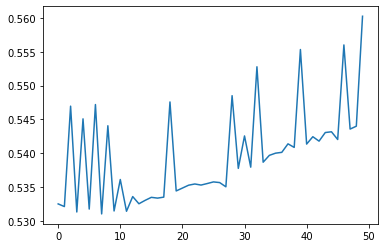

In [45]:
z = linspace(0,1,n)
total_dz = z - sim.z_arr 
total_dz = total_dz #- total_dz[0]
plot(total_dz)

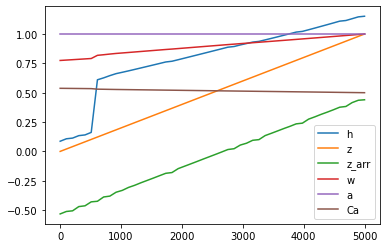

In [46]:
x = linspace(0,5000,n)
z = linspace(0,1,n)

xmid = (x[1:] + x[:-1])/2.
plot(x, sim.h)
plot(x,z)
plot(x,sim.z_arr)

#plot(xmid,sim.fd_mids)
plot(x,sim.CO2_w)
plot(x,sim.CO2_a)
plot(x,sim.Ca)
legend(['h','z','z_arr','w','a','Ca'])


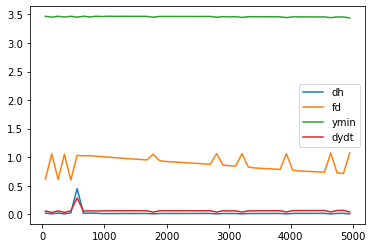

In [47]:
xmid = (x[1:] + x[:-1])/2.
plot(xmid, sim.h[1:]-sim.h[:-1])
plot(xmid,sim.fd_mids)

ymins = []
dydt = []
for i in arange(n-1):
    #print('i=',i, '  ymin=',sim.xcs[i].y.min())
    ymins.append(sim.xcs[i].ymin)
    dydt.append(sim.xcs[i].dr.max())
    
plot(xmid,array(ymins)+4.)
plot(xmid,array(dydt)*100)
legend(['dh','fd','ymin','dydt'])

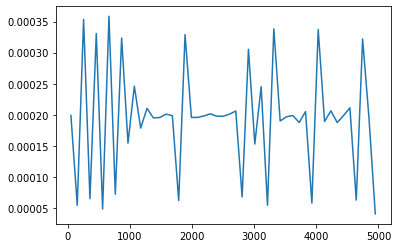

In [48]:
plot(xmid,sim.slopes)

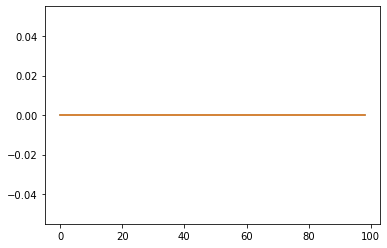

In [17]:
plot(sim.down_offsets)
plot(sim.up_offsets)

In [18]:
sim.flow_type

array(['pbflood', 'pbflood', 'pbflood', 'pbflood', 'full', 'pbflood',
       'pbflood', 'pbflood', 'full', 'pbflood', 'pbflood', 'pbflood',
       'pbflood', 'pbflood', 'pbflood', 'pbflood', 'pbflood', 'pbflood',
       'pbflood', 'pbflood', 'pbflood', 'pbflood', 'pbflood', 'pbflood',
       'pbflood', 'pbflood', 'pbflood', 'pbflood', 'full', 'pbflood',
       'pbflood', 'pbflood', 'full', 'pbflood', 'norm', 'pbflood',
       'pbflood', 'full', 'pbflood', 'pbflood', 'pbflood', 'full',
       'pbflood', 'pbflood', 'full', 'pbflood', 'full', 'pbflood', 'full',
       'pbflood', 'pbflood', 'full', 'pbflood', 'pbflood', 'pbflood',
       'pbflood', 'full', 'pbflood', 'pbflood', 'pbflood', 'full',
       'pbflood', 'pbflood', 'pbflood', 'pbflood', 'pbflood', 'pbflood',
       'pbflood', 'pbflood', 'pbflood', 'pbflood', 'pbflood', 'full',
       'pbflood', 'full', 'pbflood', 'pbflood', 'pbflood', 'pbflood',
       'norm', 'pbflood', 'pbflood', 'pbflood', 'pbflood', 'pbflood',
       'pbflood

In [ ]:
from scipy.interpolate import splprep,splev,interp1d

In [ ]:
splprep()
splev()
interp1d()

In [ ]:
print(sim.flow_type)
print(sim.A_a)
print(sim.A_w)
print(sim.fd_mids)
for i in arange(n-1):
    print('i=',i, '  ymin=',sim.xcs[i].y.min())

about to minimize
found min
Q residual for 0.3488747046211414  = 4.6127693345554555e-08
norm_fd= -0.188753426807091
crit fd, y= -0.5196762198627365


0.1

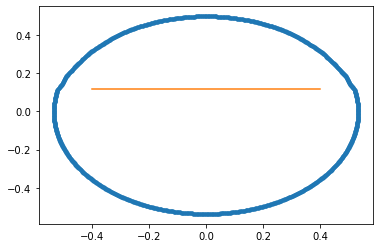

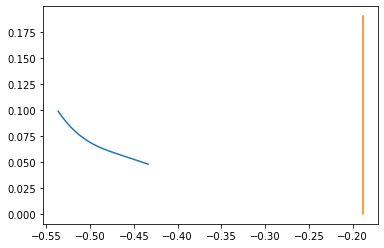

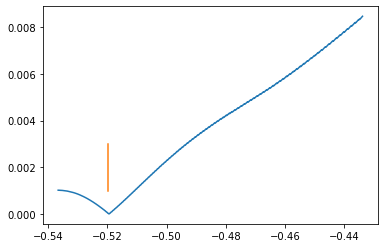

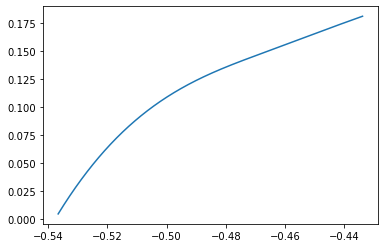

In [43]:
from scipy.signal import savgol_filter

i=42

g=9.8
f=0.1
x=sim.xcs[i].x
y=sim.xcs[i].y
xp=sim.xcs[i].xp
yp=sim.xcs[i].yp
xm=sim.xcs[i].xm
ym=sim.xcs[i].ym
plot(x,y,'.')
wl = sim.fd_mids[i] + y.min()
#wl_old = fd_old + y.min()
plot([-.4,.4],[wl,wl])
#plot([-.4,.4],[wl_old,wl_old],'--')
#xlim([-2.8,2.8])
#ylim([-3.9,-3.75])
maxdepth = y.max() - y.min()
fds=maxdepth*linspace(0.001,0.1,1000)
res=[]
res_alt=[]
res2 = []
As = []
Pws = []
for fd in fds:
    A = sim.xcs[i].A_interp(fd)
    P = sim.xcs[i].P_interp(fd)
    D_H = 4.*A/P
    Q = sign(sim.slopes[i])*A*sqrt(2.*g*abs(sim.slopes[i])*D_H/f)
    res_alt.append(A*sqrt(D_H)-sim.Q_w/(sign(sim.slopes[i])*sqrt(2.*g*abs(sim.slopes[i])/f)))#(abs(sim.Q_w - Q)))
    
    res.append(sim.xcs[i].abs_normal_discharge_residual(fd,sim.slopes[i],0.1,sim.Q_w))
    As.append(sim.xcs[i].calcA(wantidx=y-y.min()<fd))
    Pws.append(sim.xcs[i].calcP(wantidx=y-y.min()<fd))
    res2.append(sim.xcs[i].abs_crit_flow_depth_residual(fd,sim.Q_w))

As = array(As)
fil_As = savgol_filter(As,35,1)


figure()
plot(fds+y.min(),res)
norm_fd_y = sim.xcs[i].calcNormalFlowDepth(sim.Q_w,sim.slopes[i],f=f,old_fd=sim.fd_mids[i]) + y.min()
plot([norm_fd_y,norm_fd_y], [0.0,0.19])
print('norm_fd=',norm_fd_y)
#plot(fds*maxdepth+y.min(),res2)

#plot(fds*maxdepth+y.min(),res_alt)
#plot(fil_As,res_alt)
#xlim([-4,-3])

#ylim([-.05,.2])
#ylim([-0.05,0.05])
figure()
plot(fds+y.min(),res2)
crit_fd_y = sim.xcs[i].calcCritFlowDepth(sim.Q_w)+y.min()
print('crit fd, y=',crit_fd_y)
plot([crit_fd_y,crit_fd_y],[0.001,0.003])
#xlim([-4,-3])
#print(res[0]-res[1])


figure()
#sim.xcs[i].create_A_interp()
#A_spline=sim.xcs[i].AfromSpline(fds*maxdepth)
#sim.xcs[i].create_P_interp()


#plot(fds*maxdepth+y.min(),As)
#plot(fds*maxdepth+y.min(),fil_As)
plot(fds+y.min(),sim.xcs[i].A_interp(fds))

#figure()
#plot(fds*maxdepth+y.min(),Pws)
#plot(fds*maxdepth+y.min(),sim.xcs[i].P_interp(fds))

#figure()

#Pws = array(Pws)
#Qs = fil_As*sqrt(4*fil_As/Pws)
#plot(fds*maxdepth+y.min(),Qs)

#print(Pws[0])
#sim.fd_mids[i]+y.min()
sim.xcs[i].abs_normal_discharge_residual(-3.4-y.min(), sim.slopes[i], 0.1, sim.Q_w)
#-3.67486-y.min()

In [ ]:
fds

In [ ]:
Tb=sim.xcs[-1].T_b
ywet = y[sim.xcs[-1].wetidx]
xwet = x[sim.xcs[-1].wetidx]
#plot(xwet[1:],Tb[1:]-Tb[:-1])
#plot(xwet,Tb)
dr=sim.xcs[-1].dr
#plot(xwet[1:],dr[1:]-dr[:-1])
plot(xwet,dr)

In [ ]:
from scipy.signal import savgol_filter

fil_dr = savgol_filter(dr,15,3,mode='wrap')
plot(xwet,dr,xwet,fil_dr)
figure()
plot(fil_dr[1:]-fil_dr[:-1])

In [ ]:
diff_bnd=0
diff_bnd2=1

V_w = sim.V_w
V_w_mean = sim.V_w_mean
dx = sim.dx_ad
dt = sim.dt_ad
CO2_w = sim.CO2_w
CO2_a = sim.CO2_a
print((1./dt -(np.sign(V_w[0])*V_w[diff_bnd]/V_w_mean)/(2.*dx))*CO2_w[diff_bnd])

print(((np.sign(V_w[0])*V_w[diff_bnd]/V_w_mean)/(2*dx))*CO2_w[diff_bnd2])

In [ ]:
sim.

In [ ]:
np.sign(V_w[0])*(V_w[diff_bnd]/V_w_mean)

In [ ]:
V_w_mean

In [ ]:
from olm.calcite import concCaEqFromPCO2,solutionFromCaPCO2,palmerFromSolution,pwpFromSolution,pwp_to_mm_yr

In [ ]:
concCaEqFromPCO2()

In [ ]:
from olm.calcite import concCaEqFromPCO2,solutionFromCaPCO2,palmerFromSolution,calc_K_H
g=9.8#m/s^2
rho_limestone = 2.6#g/cm^3
rho_w = 998.2#kg/m^3
D_Ca = 10**-9#m^2/s
nu = 1.3e-6#m^2/s at 10 C
Sc = nu/D_Ca
g_mol_CaCO3 = 100.09
L_per_m3 = 1000.
secs_per_year =  3.154e7
secs_per_hour = 60.*60.


#print(Sc)

In [ ]:
sim.update_dimnless_params()
sim.initialize_conc_arrays()

K_w = sim.gas_transf_vel*sim.W/sim.A_w
K_a = sim.gas_transf_vel*sim.W/sim.A_a
        

F = np.zeros(sim.n_nodes - 1)
F_palmer = np.zeros(sim.n_nodes - 1)

mm_yr_to_mols_sec = 100.*rho_limestone/g_mol_CaCO3/secs_per_year/100./(sim.D_H_w/2.)

i=sim.n_nodes-1
this_CO2_w = sim.CO2_w[i]*sim.pCO2_high
this_CO2_a = sim.CO2_a[i]*sim.pCO2_high
this_Ca = sim.Ca[i]*sim.Ca_eq_0
#if palmer:
sol = solutionFromCaPCO2(this_Ca, this_CO2_w, T_C=sim.T_cave)
F_pwp = pwp_to_mm_yr(pwpFromSolution(sol,PCO2=this_CO2_w))
F_palmer[i-1] = palmerFromSolution(sol, PCO2=this_CO2_w)
R_palmer = F_palmer[i-1]*mm_yr_to_mols_sec[i-1]
this_xc = sim.xcs[i-1]
eSlope = (sim.h[i] - sim.h[i-1])/sim.L_arr[i-1]
this_xc.setEnergySlope(eSlope)
this_xc.setMaxVelPoint(sim.fd_mids[i-1])
this_xc.calcUmax(sim.Q_w)
T_b = this_xc.calcT_b()
eps = 5*nu*Sc**(-1./3.)/np.sqrt(T_b/rho_w)
#print(eps)
Ca_Eq = concCaEqFromPCO2(this_CO2_w, T_C=sim.T_cave)
#print(this_Ca,Ca_Eq)
F_xc = (D_Ca/eps)*(Ca_Eq - this_Ca)*L_per_m3
P_w = this_xc.wet_ls.sum()
A_w = this_xc.calcA(this_xc.wetidx)
F[i-1] = np.sum(F_xc*this_xc.wet_ls)/P_w #Units of F are mols/m^2/sec
R = F[i-1]*P_w*sim.L_arr[i-1]#4.*F[i-1]/sim.D_H_w[i-1]
sim.F = F
R_CO2 = R/sim.K_H
#dx is negative, so signs on dC terms flip
dCO2_a = -sim.L_arr[i-1]*K_a[i-1]/sim.V_a[i-1]*(this_CO2_w - this_CO2_a)
dCO2_w = sim.L_arr[i-1]*K_w[i-1]/sim.V_w[i-1]*(this_CO2_w - this_CO2_a) - R_CO2/sim.Q_w/L_per_m3#sim.L_arr[i-1]*R_CO2/sim.V_w[i-1]
dCa = R/sim.Q_w/L_per_m3#-sim.L_arr[i-1]*R/sim.V_w[i-1]/(sim.L_arr[i-1]*A_w)/L_per_m3
print(dCO2_a,dCO2_w,dCa)
sim.CO2_a[i-1] = (this_CO2_a + dCO2_a)/sim.pCO2_high
sim.CO2_w[i-1] = (this_CO2_w + dCO2_w)/sim.pCO2_high
sim.Ca[i-1] = (this_Ca + dCa)/sim.Ca_eq_0


In [ ]:
print(sim.Q_w)
print(A_w*sim.V_w[i-1])
sim.L_arr[i-1]*R_CO2/sim.V_w[i-1]
R_CO2/sim.Q_w/L_per_m3

In [ ]:
this_xc.x[this_xc.wetidx].shape
F_xc.

In [ ]:
Re = abs(sim.V_w[i-1])*sim.D_H_w[i-1]/nu
print(Re)
f = 0.1
Sh = (f/8)*(Re-1000)*Sc/(1+12.7*sqrt(f/8)*(Sc**(2./3.) - 1))
print(Sh)
eps_test = sim.D_H_w[i-1]/Sh
print(eps_test)

In [ ]:
D_Ca/eps_test

In [ ]:
sim.D_H_w[i-1]

In [ ]:
eSlope

In [ ]:
cm_m=100.
F_to_m_yr = g_mol_CaCO3*secs_per_year/rho_limestone/cm_m**3
print(F_to_m_yr*sim.xcs[0].F_xc)